Nicole Stefanie Caro Rodriguez - Daniel Alfonso Lopez Sierra

## Proyecto 2

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly
import pandas as pd
import geopandas as gpd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.patches import Ellipse
import seaborn as sns
from shapely.geometry import Polygon
from shapely import geometry
from sklearn.cluster import DBSCAN
import scipy.stats as stats

In [7]:


!pip install mapclassify
import mapclassify

In [8]:
!pip install wbgapi #instalando una librería del banco mundial
import wbgapi as wb #importando la librería del banco mundial

In [9]:
wb.series.metadata.get('SP.DYN.LE00.IN')

========
Series: SP.DYN.LE00.IN

Aggregationmethod: Weighted average
--------
Developmentrelevance: Mortality rates for different age groups (infants, children, and adults) and overall mortality indicators (life expectancy at birth or survival to a given age) are important indicators of health status in a country. Because data on the incidence and prevalence of diseases are frequently unavailable, mortality rates are often used to identify vulnerable populations. And they are among the indicators most frequently used to compare socioeconomic development across countries.
--------
IndicatorName: Life expectancy at birth, total (years)
--------
License_Type: CC BY-4.0
--------
License_URL: https://datacatalog.worldbank.org/public-licenses#cc-by
--------
Limitationsandexceptions: Annual data series from United Nations Population Division's World Population Prospects are interpolated data from 5-year period data. Therefore they may not reflect real events as much as observed data.
--------
Longdefinition: Life expectancy at birth indicates the number of years a newborn infant would live if prevailing patterns of mortality at the time of its birth were to stay the same throughout its life.
--------
Periodicity: Annual
--------
Source: (1) United Nations Population Division. World Population Prospects: 2022 Revision, or derived from male and female life expectancy at birth from sources such as: (2) Census reports and other statistical publications from national statistical offices, (3) Eurostat: Demographic Statistics, (4) United Nations Statistical Division. Population and Vital Statistics Reprot (various years), (5) U.S. Census Bureau: International Database, and (6) Secretariat of the Pacific Community: Statistics and Demography Programme.
--------
Statisticalconceptandmethodology: Life expectancy at birth used here is the average number of years a newborn is expected to live if mortality patterns at the time of its birth remain constant in the future. It reflects the overall mortality level of a population, and summarizes the mortality pattern that prevails across all age groups in a given year. It is calculated in a period life table which provides a snapshot of a population's mortality pattern at a given time. It therefore does not reflect the mortality pattern that a person actually experiences during his/her life, which can be calculated in a cohort life table.

High mortality in young age groups significantly lowers the life expectancy at birth. But if a person survives his/her childhood of high mortality, he/she may live much longer. For example, in a population with a life expectancy at birth of 50, there may be few people dying at age 50. The life expectancy at birth may be low due to the high childhood mortality so that once a person survives his/her childhood, he/she may live much longer than 50 years.
--------
Topic: Health: Mortality

In [10]:
wb.series.metadata.get('NY.GDP.PCAP.CD')

========
Series: NY.GDP.PCAP.CD

Aggregationmethod: Weighted average
--------
IndicatorName: GDP per capita (current US$)
--------
License_Type: CC BY-4.0
--------
License_URL: https://datacatalog.worldbank.org/public-licenses#cc-by
--------
Longdefinition: GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars.
--------
Periodicity: Annual
--------
Source: World Bank national accounts data, and OECD National Accounts data files.
--------
Statisticalconceptandmethodology: For more information, see the metadata for current U.S. dollar GDP (NY.GDP.MKTP.CD) and total population (SP.POP.TOTL).
--------
Topic: Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators

In [11]:
wb.series.metadata.get('EG.ELC.ACCS.ZS')

========
Series: EG.ELC.ACCS.ZS

Aggregationmethod: Weighted average
--------
Developmentrelevance: Maintaining reliable and secure electricity services while seeking to rapidly decarbonize power systems is a key challenge for countries throughout the world. More and more countries are becoming increasing dependent on reliable and secure electricity supplies to underpin economic growth and community prosperity. This reliance is set to grow as more efficient and less carbon intensive forms of power are developed and deployed to help decarbonize economies.

Energy is necessary for creating the conditions for economic growth. It is impossible to operate a factory, run a shop, grow crops or deliver goods to consumers without using some form of energy. Access to electricity is particularly crucial to human development as electricity is, in practice, indispensable for certain basic activities, such as lighting, refrigeration and the running of household appliances, and cannot easily be replaced by other forms of energy. Individuals' access to electricity is one of the most clear and un-distorted indication of a country's energy poverty status.

Electricity access is increasingly at the forefront of governments' preoccupations, especially in the developing countries. As a consequence, a lot of rural electrification programs and national electrification agencies have been created in these countries to monitor more accurately the needs and the status of rural development and electrification.

Use of energy is important in improving people's standard of living. But electricity generation also can damage the environment. Whether such damage occurs depends largely on how electricity is generated. For example, burning coal releases twice as much carbon dioxide - a major contributor to global warming - as does burning an equivalent amount of natural gas.
--------
IndicatorName: Access to electricity (% of population)
--------
License_Type: CC BY-4.0
--------
License_URL: https://datacatalog.worldbank.org/public-licenses#cc-by
--------
Longdefinition: Access to electricity is the percentage of population with access to electricity. Electrification data are collected from industry, national surveys and international sources.
--------
Periodicity: Annual
--------
Source: IEA, IRENA, UNSD, World Bank, WHO. 2023. Tracking SDG 7: The Energy Progress Report. World Bank, Washington DC. © World Bank. License: Creative Commons Attribution—NonCommercial 3.0 IGO (CC BY-NC 3.0 IGO).
--------
Statisticalconceptandmethodology: The World Bank’s Global Electrification Database (GED) compiles nationally representative household survey data, and occasionally census data, from sources going back as far as 1990. The database also incorporates data from the Socio-Economic Database for Latin America and the Caribbean (SEDLAC), Middle East and North Africa Poverty Database (MNAPOV) and the Europe and Central Asia Poverty Database (ECAPOV), which are based on similar surveys. At the time of this analysis, the GED contained 1,375 surveys for 149 countries in 1990-2021.
--------
Topic: Environment: Energy production & use

In [12]:
wb.series.metadata.get('SL.UEM.TOTL.ZS')

========
Series: SL.UEM.TOTL.ZS

Aggregationmethod: Weighted average
--------
Developmentrelevance: Paradoxically, low unemployment rates can disguise substantial poverty in a country, while high unemployment rates can occur in countries with a high level of economic development and low rates of poverty. In countries without unemployment or welfare benefits people eke out a living in vulnerable employment. In countries with well-developed safety nets workers can afford to wait for suitable or desirable jobs. But high and sustained unemployment indicates serious inefficiencies in resource allocation.

Youth unemployment is an important policy issue for many economies. Young men and women today face increasing uncertainty in their hopes of undergoing a satisfactory transition in the labour market, and this uncertainty and disillusionment can, in turn, have damaging effects on individuals, communities, economies and society at large. Unemployed or underemployed youth are less able to contribute effectively to national development and have fewer opportunities to exercise their rights as citizens. They have less to spend as consumers, less to invest as savers and often have no "voice" to bring about change in their lives and communities. Widespread youth unemployment and underemployment also prevents companies and countries from innovating and developing competitive advantages based on human capital investment, thus undermining future prospects.

Unemployment is a key measure to monitor whether a country is on track to achieve the Sustainable Development Goal of promoting sustained, inclusive and sustainable economic growth, full and productive employment and decent work for all. [SDG Indicator 8.5.2]
--------
Generalcomments: National estimates are also available in the WDI database. Caution should be used when comparing ILO estimates with national estimates.
--------
IndicatorName: Unemployment, total (% of total labor force) (modeled ILO estimate)
--------
License_Type: CC BY-4.0
--------
License_URL: https://datacatalog.worldbank.org/public-licenses#cc-by
--------
Limitationsandexceptions: The criteria for people considered to be seeking work, and the treatment of people temporarily laid off or seeking work for the first time, vary across countries. In many cases it is especially difficult to measure employment and unemployment in agriculture. The timing of a survey can maximize the effects of seasonal unemployment in agriculture. And informal sector employment is difficult to quantify where informal activities are not tracked.

There may be also persons not currently in the labour market who want to work but do not actively "seek" work because they view job opportunities as limited, or because they have restricted labour mobility, or face discrimination, or structural, social or cultural barriers. The exclusion of people who want to work but are not seeking work (often called the "hidden unemployed" or "discouraged workers") is a criterion that will affect the unemployment count of both women and men. 

However, women tend to be excluded from the count for various reasons. Women suffer more from discrimination and from structural, social, and cultural barriers that impede them from seeking work. Also, women are often responsible for the care of children and the elderly and for household affairs. They may not be available for work during the short reference period, as they need to make arrangements before starting work. Further, women are considered to be employed when they are working part-time or in temporary jobs, despite the instability of these jobs or their active search for more secure employment.
--------
Longdefinition: Unemployment refers to the share of the labor force that is without work but available for and seeking employment.
--------
Notesfromoriginalsource: Given the exceptional situation, including the scarcity of relevant data, the  ILO modeled estimates and projections from 2020 onwards are subject to subst

In [13]:
wb.series.metadata.get('SP.POP.GROW')

========
Series: SP.POP.GROW

Aggregationmethod: Weighted average
--------
IndicatorName: Population growth (annual %)
--------
License_Type: CC BY-4.0
--------
License_URL: https://datacatalog.worldbank.org/public-licenses#cc-by
--------
Longdefinition: Annual population growth rate for year t is the exponential rate of growth of midyear population from year t-1 to t, expressed as a percentage . Population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship.
--------
Periodicity: Annual
--------
Shortdefinition: Annual population growth rate. Population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship.
--------
Source: Derived from total population. Population source: (1) United Nations Population Division. World Population Prospects: 2022 Revision, (2) Census reports and other statistical publications from national statistical offices, (3) Eurostat: Demographic Statistics, (4) United Nations Statistical Division. Population and Vital Statistics Reprot (various years), (5) U.S. Census Bureau: International Database, and (6) Secretariat of the Pacific Community: Statistics and Demography Programme.
--------
Statisticalconceptandmethodology: Total population growth rates are calculated on the assumption that rate of growth is constant between two points in time. The growth rate is computed using the exponential growth formula:

r = ln(pn/p0)/n, 

where r is the exponential rate of growth, ln() is the natural logarithm, pn is the end period population, p0 is the beginning period population, and n is the number of years in between. Note that this is not the geometric growth rate used to compute compound growth over discrete periods.

For information on total population from which the growth rates are calculated, see total population (SP.POP.TOTL).
--------
Topic: Health: Population: Dynamics

##**Expectativa de vida al nacer**

In [14]:
d_expectancy = wb.data.DataFrame('SP.DYN.LE00.IN',
                                  economy=["COL","BRA","ARG","CHL","PER","ECU","URY","PRY","VEN","BOL","CAN","MEX","USA","CRI"],
                                  time=range(2002,2020),
                                  labels=True).reset_index(drop=True)
d_expectancy

Country     YR2002     YR2003     YR2004     YR2005     YR2006  \
0      Costa Rica  77.983000  78.072000  78.331000  78.505000  78.514000   
1   United States  76.936585  77.036585  77.487805  77.487805  77.687805   
2          Mexico  74.106000  74.274000  74.372000  74.376000  74.331000   
3          Canada  79.530732  79.715122  79.992195  80.112683  80.543659   
4         Bolivia  63.306000  63.635000  64.004000  64.386000  64.779000   
5   Venezuela, RB  72.662000  71.940000  72.514000  72.782000  72.742000   
6        Paraguay  70.025000  70.297000  70.481000  70.527000  70.781000   
7         Uruguay  75.540000  75.785000  76.007000  76.194000  76.362000   
8         Ecuador  73.613000  73.975000  74.279000  74.514000  74.689000   
9            Peru  71.661000  72.217000  72.668000  72.986000  73.172000   
10          Chile  77.445000  77.387000  77.616000  78.016000  78.261000   
11      Argentina  74.408000  74.080000  74.855000  75.139000  75.433000   
12         Brazil  70.410000  70.720000  71.131000  71.753000  72.037000   
13       Colombia  71.939000  72.361000  72.695000  73.081000  73.468000   

       YR2007     YR2008     YR2009     YR2010     YR2011     YR2012  \
0   78.462000  78.445000  78.672000  78.670000  79.348000  79.283000   
1   77.987805  78.039024  78.390244  78.541463  78.641463  78.741463   
2   74.238000  74.152000  74.119000  74.190000  74.365000  74.574000   
3   80.543659  80.724634  81.066098  81.322195  81.482683  81.663659   
4   65.027000  65.446000  65.880000  66.162000  66.534000  66.705000   
5   73.058000  72.436000  72.579000  72.890000  72.913000  73.036000   
6   71.106000  71.384000  71.635000  71.887000  72.131000  72.454000   
7   76.498000  76.623000  76.738000  76.858000  76.983000  77.111000   
8   74.844000  74.983000  75.184000  75.430000  75.743000  76.062000   
9   73.223000  73.377000  73.466000  73.711000  74.133000  74.544000   
10  77.826000  78.484000  78.741000  78.501000  79.110000  79.023000   
11  75.006000  75.641000  75.936000  75.721000  76.124000  76.467000   
12  72.365000  72.715000  72.948000  73.182000  73.343000  73.552000   
13  73.837000  74.295000  74.742000  75.033000  75.320000  75.597000   

       YR2013     YR2014     YR2015     YR2016     YR2017     YR2018  \
0   79.403000  78.774000  79.086000  79.459000  79.377000  79.484000   
1   78.741463  78.841463  78.690244  78.539024  78.539024  78.639024   
2   74.739000  74.797000  74.682000  74.412000  74.138000  74.015000   
3   81.744878  81.784390  81.815610  81.924878  81.832927  81.843902   
4   67.021000  67.163000  67.318000  67.628000  67.701000  67.748000   
5   73.196000  72.853000  73.006000  72.058000  71.943000  71.979000   
6   72.757000  72.878000  73.191000  73.534000  73.644000  73.568000   
7   77.240000  77.366000  77.483000  77.571000  77.625000  77.611000   
8   76.369000  76.622000  76.789000  76.763000  76.972000  77.094000   
9   74.967000  75.333000  75.621000  75.789000  75.879000  76.009000   
10  79.339000  79.473000  79.746000  80.079000  80.350000  80.133000   
11  76.491000  76.755000  76.760000  76.308000  76.833000  76.999000   
12  73.918000  74.306000  74.332000  74.442000  74.827000  75.109000   
13  75.827000  76.043000  76.257000  76.471000  76.646000  76.748000   

       YR2019  
0   79.427000  
1   78.787805  
2   74.202000  
3   82.228780  
4   67.841000  
5   72.161000  
6   73.621000  
7   77.508000  
8   77.297000  
9   76.156000  
10  80.326000  
11  77.284000  
12  75.338000  
13  76.752000

##**PIB per capita**

In [15]:
d_gdppc = wb.data.DataFrame('NY.GDP.PCAP.CD',
                                  economy=["COL","BRA","ARG","CHL","PER","ECU","URY","PRY","VEN","BOL","CAN","MEX","USA","CRI"],
                                  time=range(2002,2020),
                                  labels=True).reset_index(drop=True)
d_gdppc

Country        YR2002        YR2003        YR2004        YR2005  \
0      Costa Rica   4021.425361   4123.506487   4376.080428   4643.458570   
1   United States  37997.759657  39490.274956  41724.631629  44123.407068   
2          Mexico   7650.931864   7120.372121   7525.487461   8321.859856   
3          Canada  24255.338582  28300.463096  32143.681408  36382.507916   
4         Bolivia    888.198576    892.355380    951.951623   1018.313662   
5   Venezuela, RB   3667.200194   3243.368805   4287.631579   5456.322425   
6        Paraguay   1361.249281   1436.764904   1776.932258   1960.514766   
7         Uruguay   4115.154614   3638.943548   4130.100115   5233.457171   
8         Ecuador   2184.209244   2438.343684   2703.565671   3014.310009   
9            Peru   2003.971081   2126.137824   2393.665897   2702.237701   
10          Chile   4479.175044   4824.220541   6185.514792   7561.830548   
11      Argentina   2579.488769   3333.152904   4258.160261   5086.627761   
12         Brazil   2824.715396   3056.649680   3623.223905   4773.268480   
13       Colombia   2421.162103   2305.170507   2811.459450   3448.538274   

          YR2006        YR2007        YR2008        YR2009        YR2010  \
0    5188.361792   6055.086779   6841.911460   6737.860754   8147.243985   
1   46302.000880  48050.223777  48570.045980  47194.943355  48650.643128   
2    9125.387739   9719.927864  10119.821057   8104.922573   9399.964709   
3   40504.060725  44659.895141  46710.505576  40876.310154  47562.083425   
4    1200.068092   1351.035154   1687.578567   1725.146286   1922.058662   
5    6769.868414   8369.235268  11310.778170  11641.799147  13692.914967   
6    2426.417098   3194.262982   4360.429101   3920.186073   4702.915770   
7    5942.126667   7149.374634   9328.065857   9780.739473  12512.594127   
8    3340.840903   3579.032244   4260.433184   4240.702593   4640.246344   
9    3123.320159   3572.363589   4184.885982   4164.970483   5047.204643   
10   9418.062718  10461.366089  10783.170821  10182.860565  12767.782041   
11   5890.978002   7210.595548   8977.506851   8184.389889  10385.964432   
12   5866.024313   7323.190340   8801.759475   8569.901805  11249.293741   
13   3782.603504   4762.082973   5534.689447   5245.951665   6392.758026   

          YR2011        YR2012        YR2013        YR2014        YR2015  \
0    9137.455102   9971.651656  10633.266560  10737.678875  11529.955174   
1   50065.966504  51784.418574  53291.127689  55123.849787  56762.729452   
2   10341.500238  10376.090495  10865.687291  11076.134114   9753.400562   
3   52223.696112  52669.089963  52635.174958  50955.998323  43596.135537   
4    2304.982295   2562.466784   2853.797162   3022.462884   2975.648811   
5   10877.112364  12937.927597  12433.980785  15975.729375           NaN   
6    5772.995510   5621.244026   6435.826550   6629.426519   5861.389724   
7   14975.562560  16087.252078  18140.891918  18131.578847  16950.753376   
8    5202.656459   5678.455721   6050.354611   6374.631486   6130.586676   
9    5826.832307   6475.719417   6697.187683   6614.830499   6180.118799   
10  14628.572457  15406.492836  15833.275919  14666.343117  13569.948127   
11  12848.740476  13082.664326  13080.254732  12334.798245  13789.060425   
12  13200.558166  12327.515556  12258.564849  12071.404655   8783.214413   
13   7392.943600   8096.801510   8263.641929   8167.472842   6228.651622   

          YR2016        YR2017        YR2018        YR2019  
0   11899.813978  12118.133618  12383.149947  12669.341162  
1   57866.744934  59907.754261  62823.309438  65120.394663  
2    8875.082069   9434.378179   9857.007487  10145.152628  
3   42315.603706  45129.429298  46547.795182  46374.152752  
4    3013.502707   3280.008214   3471.006951   3472.380831  
5            NaN           NaN           NaN           NaN  
6    5759.018333   6136.058354   6242.961502   5807.838814  
7   16837.940380  18995.397020  19026.049611  18098.361549  
8    6079.088736   6246

##**Acceso a la electricidad**

In [16]:
d_electricity = wb.data.DataFrame('EG.ELC.ACCS.ZS',
                                  economy=["COL","BRA","ARG","CHL","PER","ECU","URY","PRY","VEN","BOL","CAN","MEX","USA","CRI"],
                                  time=range(2002,2020),
                                  labels=True).reset_index(drop=True)
d_electricity

Country      YR2002      YR2003      YR2004      YR2005      YR2006  \
0      Costa Rica   98.509188   98.695902   98.954779   99.053051   99.147523   
1   United States  100.000000  100.000000  100.000000  100.000000  100.000000   
2          Mexico   97.897085   97.359390   98.597701   98.932728   99.114160   
3          Canada  100.000000  100.000000  100.000000  100.000000  100.000000   
4         Bolivia   63.996855   72.300000   75.865852   68.288209   76.211281   
5   Venezuela, RB   99.800000   95.700000   99.100000   98.776756   99.300000   
6        Paraguay   91.666443   92.558399   93.249876   94.686886   96.749045   
7         Uruguay   97.801666   97.875778   97.955353   98.047409   98.505426   
8         Ecuador   94.233971   94.973044   94.764267   95.832650   96.315259   
9            Peru   74.382688   74.380966   75.692357   77.173645   80.157275   
10          Chile   97.266685   98.782325   97.533730   97.682465   99.368108   
11      Argentina   96.096001   96.297951   96.505371   96.725266   96.964409   
12         Brazil   96.652996   96.980098   96.765107   97.093513   97.594314   
13       Colombia   94.881042   95.077187   95.278801   96.800000   95.726227   

        YR2007      YR2008      YR2009      YR2010      YR2011      YR2012  \
0    99.217998   99.263937   99.409804   98.995734   99.232348   99.503298   
1   100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
2    97.914604   98.914037   98.296799   99.236696   99.004723   99.111637   
3   100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
4    80.156567   84.674991   86.765597   87.952415   88.335943   90.387375   
5    98.852371   98.917816   98.996658   99.085045   98.840000   99.275101   
6    96.452771   96.677896   96.891335   97.430860   98.236560   97.835616   
7    98.692636   98.784355   99.100000   99.300000   99.170000   99.600000   
8    96.812618   97.206576   96.470862   97.462142   96.872699   97.194929   
9    81.988131   84.678343   86.424320   88.123061   89.707491   91.099508   
10   98.039268   98.245316   99.593662   99.525894   99.588193  100.000000   
11   97.224396   97.501602   97.792206   98.820000   99.034286   99.143799   
12   98.125382   98.526625   98.856938   98.600000   99.328691   99.519494   
13   95.980408   96.806763   96.057229   96.788995   96.693600   97.032176   

        YR2013      YR2014      YR2015      YR2016  YR2017      YR2018  \
0    99.563517   99.359291   99.409804   99.500000    99.6   99.700000   
1   100.000000  100.000000  100.000000  100.000000   100.0  100.000000   
2    99.145050   99.172928   99.000000   99.500000   100.0   99.500000   
3   100.000000  100.000000  100.000000  100.000000   100.0  100.000000   
4    89.505686   90.038729   91.522822   91.800000    91.8   92.800000   
5    99.369095  100.000000  100.000000   99.400000    99.2   99.878197   
6    99.015884   99.000716   99.331532   98.400000    99.3   99.600000   
7    99.611808   99.657085   99.709480   99.700000    99.8   99.800000   
8    98.034674   98.976067   98.825883   98.700000    99.2   98.700000   
9    92.135365   92.919989   93.852179   94.200000    94.8   95.200000   
10   99.600000  100.000000   99.714844  100.000000    99.7  100.000000   
11   99.285774  100.000000   99.689034   99.899742   100.0   99.993736   
12   99.575151   99.650247   99.710902   99.700000    99.8   99.700000   
13   97.779418   97.790938   98.186898   98.400000    98.5   98.500000   

       YR2019  
0    99.71000  
1   100.00000  
2    99.60000  
3   100.00000  
4    95.08000  
5    99.84478  
6    99.70000  
7    99.90000  
8    99.09000  
9    95.55136  
10  100.00000  
11  100.00000  
12   99.80000  
13   99.44426

##**Desempleo (%)**

In [17]:
d_unemployment = wb.data.DataFrame('SL.UEM.TOTL.ZS',
                                  economy=["COL","BRA","ARG","CHL","PER","ECU","URY","PRY","VEN","BOL","CAN","MEX","USA","CRI"],
                                  time=range(2002,2020),
                                  labels=True).reset_index(drop=True)
d_unemployment

Country  YR2002  YR2003  YR2004  YR2005  YR2006  YR2007  YR2008  \
0      Costa Rica   6.330   6.560   6.390   6.570   5.740   4.490    4.78   
1   United States   5.780   5.990   5.530   5.080   4.620   4.620    5.78   
2          Mexico   3.000   3.460   3.940   3.560   3.570   3.630    3.87   
3          Canada   7.660   7.570   7.190   6.760   6.320   6.040    6.14   
4         Bolivia   2.490   2.533   2.503   2.543   2.575   2.643    2.60   
5   Venezuela, RB  16.170  16.780  15.070  10.660   8.610   7.280    6.25   
6        Paraguay   9.390   6.810   6.510   4.820   5.280   4.710    4.42   
7         Uruguay  16.650  16.660  12.980  12.010  10.840   9.400    8.03   
8         Ecuador   4.899   5.660   5.000   3.780   3.550   3.140    3.92   
9            Peru   4.840   4.150   4.710   4.870   4.170   4.080    4.03   
10          Chile  10.170   9.770  10.160   9.340   9.020   8.430    9.29   
11      Argentina  19.590  15.360  13.520  11.510  10.080   8.470    7.84   
12         Brazil  10.640  11.170  10.070  10.550   9.690   9.280    8.27   
13       Colombia  15.630  14.190  13.720  11.870  10.963  10.250   10.52   

    YR2009  YR2010  YR2011  YR2012  YR2013  YR2014  YR2015  YR2016  YR2017  \
0     7.71   7.170    9.52    9.11    8.22   8.500   8.420   8.090    7.73   
1     9.25   9.630    8.95    8.07    7.37   6.170   5.280   4.870    4.36   
2     5.36   5.300    5.17    4.89    4.91   4.810   4.310   3.860    3.42   
3     8.34   8.060    7.51    7.29    7.07   6.910   6.910   7.000    6.34   
4     2.97   2.614    2.25    2.07    2.44   2.020   3.110   3.500    3.65   
5     6.10   7.110    6.90    6.60    7.54   6.865   6.077   5.320    5.05   
6     5.46   4.570    4.67    4.09    4.38   5.030   4.560   5.250    4.61   
7     7.74   7.160    6.31    6.45    6.44   6.550   7.490   7.840    7.89   
8     4.61   4.090    3.46    3.23    3.08   3.480   3.620   4.600    3.84   
9     3.96   3.600    3.48    3.24    3.57   3.210   3.270   3.740    3.69   
10   11.31   8.410    7.32    6.64    6.20   6.650   6.490   6.730    6.95   
11    8.65   7.710    7.18    7.22    7.10   7.270   7.524   8.109    8.35   
12    9.42   8.034    7.58    7.25    7.07   6.760   8.560  11.740   12.93   
13   11.32  10.980   10.11    9.74    9.05   8.570   8.300   8.690    8.87   

    YR2018  YR2019  
0     9.01  10.810  
1     3.90   3.670  
2     3.27   3.480  
3     5.83   5.660  
4     3.52   3.680  
5     5.02   5.092  
6     6.22   6.590  
7     8.34   8.730  
8     3.53   3.810  
9     3.49   3.380  
10    7.21   7.270  
11    9.22   9.840  
12   12.46  12.050  
13    9.11   9.960

##**Crecimiento de la población**

In [18]:
d_population = wb.data.DataFrame('SP.POP.GROW',
                                  economy=["COL","BRA","ARG","CHL","PER","ECU","URY","PRY","VEN","BOL","CAN","MEX","USA","CRI"],
                                  time=range(2002,2020),
                                  labels=True).reset_index(drop=True)
d_population


Country    YR2002    YR2003    YR2004    YR2005    YR2006    YR2007  \
0      Costa Rica  1.697749  1.587933  1.520865  1.472528  1.432842  1.402737   
1   United States  0.927797  0.859482  0.925484  0.921713  0.964254  0.951055   
2          Mexico  1.520455  1.487401  1.469653  1.429512  1.360539  1.316237   
3          Canada  1.087448  0.901373  0.933021  0.944467  1.010335  0.971135   
4         Bolivia  1.751072  1.746289  1.739170  1.732988  1.747133  1.750233   
5   Venezuela, RB  1.795371  1.765156  1.710893  1.670715  1.611673  1.548769   
6        Paraguay  1.428308  1.254593  1.171276  1.111787  1.049762  0.997238   
7         Uruguay  0.166541  0.113683  0.108665  0.116535  0.139067  0.191522   
8         Ecuador  1.737093  1.748693  1.739580  1.724433  1.721115  1.718134   
9            Peru  1.176085  1.051135  0.974732  0.904184  0.827239  0.769759   
10          Chile  1.087930  1.047913  0.996674  0.977510  0.979796  0.980589   
11      Argentina  1.073538  1.032361  1.015337  1.033476  1.034672  1.006297   
12         Brazil  1.262842  1.185669  1.139393  1.117203  1.077354  1.032027   
13       Colombia  1.534867  1.481132  1.428171  1.365652  1.298865  1.239967   

      YR2008    YR2009    YR2010    YR2011    YR2012    YR2013    YR2014  \
0   1.384554  1.350394  1.287390  1.240027  1.203580  1.153272  1.094946   
1   0.945865  0.876651  0.829617  0.726787  0.733600  0.692860  0.733362   
2   1.267536  1.236744  1.326579  1.427640  1.396615  1.317161  1.241467   
3   1.082907  1.141758  1.111864  0.978698  1.085817  1.056591  1.005338   
4   1.729761  1.713114  1.696282  1.677828  1.654635  1.629573  1.603315   
5   1.474040  1.400830  1.357350  1.318577  1.278108  1.239620  1.183520   
6   0.979119  1.012124  1.151402  1.297339  1.349238  1.380359  1.406544   
7   0.224314  0.240409  0.253703  0.267668  0.282083  0.297587  0.309531   
8   1.704206  1.682479  1.660310  1.641883  1.602522  1.532423  1.483599   
9   0.716987  0.702724  0.756357  0.845382  0.918056  0.967486  1.043651   
10  1.000847  1.026941  1.009034  0.991361  0.974635  0.964976  1.006815   
11  0.992294  1.014284  0.255582  1.153059  1.136906  1.119109  1.099461   
12  0.987284  0.953148  0.939418  0.928590  0.900343  0.868346  0.857835   
13  1.167874  1.131541  1.126885  1.093583  1.039665  0.990035  0.947137   

      YR2015    YR2016    YR2017    YR2018    YR2019  
0   1.046343  1.015471  0.978713  0.934615  0.865128  
1   0.736217  0.724676  0.632644  0.526435  0.455381  
2   1.167009  1.133234  1.080421  0.951669  0.860265  
3   0.746339  1.132349  1.199521  1.412456  1.436137  
4   1.573145  1.547288  1.520109  1.487474  1.457504  
5   1.108185  0.691186 -0.580807 -2.443543 -2.904996  
6   1.422004  1.424984  1.406914  1.373970  1.336575  
7   0.328385  0.321217  0.246754  0.141388  0.039881  
8   1.479835  1.493390  1.553356  1.890909  1.909683  
9   1.172231  1.361225  1.506946  1.875822  1.909726  
10  1.029426  1.189061  1.562055  1.795963  1.791392  
11  1.078001  1.057182  1.037134  1.015808  0.993397  
12  0.845993  0.811256  0.792263  0.793768  0.766108  
13  0.941994  1.068612  1.512290  1.895587  1.830747

##**Normalizar datos**

In [19]:
expectancy=d_expectancy.set_index("Country").unstack().reset_index()
expectancy

level_0        Country          0
0    YR2002     Costa Rica  77.983000
1    YR2002  United States  76.936585
2    YR2002         Mexico  74.106000
3    YR2002         Canada  79.530732
4    YR2002        Bolivia  63.306000
..      ...            ...        ...
247  YR2019           Peru  76.156000
248  YR2019          Chile  80.326000
249  YR2019      Argentina  77.284000
250  YR2019         Brazil  75.338000
251  YR2019       Colombia  76.752000

[252 rows x 3 columns]

In [20]:
gdppc=d_gdppc.set_index("Country").unstack().reset_index()
gdppc

level_0        Country             0
0    YR2002     Costa Rica   4021.425361
1    YR2002  United States  37997.759657
2    YR2002         Mexico   7650.931864
3    YR2002         Canada  24255.338582
4    YR2002        Bolivia    888.198576
..      ...            ...           ...
247  YR2019           Peru   6955.881770
248  YR2019          Chile  14627.145016
249  YR2019      Argentina   9963.674231
250  YR2019         Brazil   8845.323931
251  YR2019       Colombia   6436.509215

[252 rows x 3 columns]

In [21]:
electricity=d_electricity.set_index("Country").unstack().reset_index()
electricity

level_0        Country           0
0    YR2002     Costa Rica   98.509188
1    YR2002  United States  100.000000
2    YR2002         Mexico   97.897085
3    YR2002         Canada  100.000000
4    YR2002        Bolivia   63.996855
..      ...            ...         ...
247  YR2019           Peru   95.551360
248  YR2019          Chile  100.000000
249  YR2019      Argentina  100.000000
250  YR2019         Brazil   99.800000
251  YR2019       Colombia   99.444260

[252 rows x 3 columns]

In [22]:
unemployment=d_unemployment.set_index("Country").unstack().reset_index()
unemployment

level_0        Country      0
0    YR2002     Costa Rica   6.33
1    YR2002  United States   5.78
2    YR2002         Mexico   3.00
3    YR2002         Canada   7.66
4    YR2002        Bolivia   2.49
..      ...            ...    ...
247  YR2019           Peru   3.38
248  YR2019          Chile   7.27
249  YR2019      Argentina   9.84
250  YR2019         Brazil  12.05
251  YR2019       Colombia   9.96

[252 rows x 3 columns]

In [23]:
population=d_population.set_index("Country").unstack().reset_index()
population

level_0        Country         0
0    YR2002     Costa Rica  1.697749
1    YR2002  United States  0.927797
2    YR2002         Mexico  1.520455
3    YR2002         Canada  1.087448
4    YR2002        Bolivia  1.751072
..      ...            ...       ...
247  YR2019           Peru  1.909726
248  YR2019          Chile  1.791392
249  YR2019      Argentina  0.993397
250  YR2019         Brazil  0.766108
251  YR2019       Colombia  1.830747

[252 rows x 3 columns]

In [24]:
dw=population.merge(gdppc, on=['level_0',"Country"],how="outer").merge(unemployment, on=['level_0',"Country"],how="outer").merge(expectancy, on=['level_0',"Country"],how="outer").merge(electricity, on=['level_0',"Country"],how="outer")

<ipython-input-24-543f7cc102aa>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  dw=population.merge(gdppc, on=['level_0',"Country"],how="outer").merge(unemployment, on=['level_0',"Country"],how="outer").merge(expectancy, on=['level_0',"Country"],how="outer").merge(electricity, on=['level_0',"Country"],how="outer")


In [25]:
dw

level_0        Country       0_x           0_y    0_x        0_y  \
0    YR2002     Costa Rica  1.697749   4021.425361   6.33  77.983000   
1    YR2002  United States  0.927797  37997.759657   5.78  76.936585   
2    YR2002         Mexico  1.520455   7650.931864   3.00  74.106000   
3    YR2002         Canada  1.087448  24255.338582   7.66  79.530732   
4    YR2002        Bolivia  1.751072    888.198576   2.49  63.306000   
..      ...            ...       ...           ...    ...        ...   
247  YR2019           Peru  1.909726   6955.881770   3.38  76.156000   
248  YR2019          Chile  1.791392  14627.145016   7.27  80.326000   
249  YR2019      Argentina  0.993397   9963.674231   9.84  77.284000   
250  YR2019         Brazil  0.766108   8845.323931  12.05  75.338000   
251  YR2019       Colombia  1.830747   6436.509215   9.96  76.752000   

              0  
0     98.509188  
1    100.000000  
2     97.897085  
3    100.000000  
4     63.996855  
..          ...  
247   95.551360  
248  100.000000  
249  100.000000  
250   99.800000  
251   99.444260  

[252 rows x 7 columns]

In [26]:
dw.columns=["año","pais","c.poblacion","pibpc","desempleo","expect.vida","acc.electricidad"]

In [27]:
dw

año           pais  c.poblacion         pibpc  desempleo  expect.vida  \
0    YR2002     Costa Rica     1.697749   4021.425361       6.33    77.983000   
1    YR2002  United States     0.927797  37997.759657       5.78    76.936585   
2    YR2002         Mexico     1.520455   7650.931864       3.00    74.106000   
3    YR2002         Canada     1.087448  24255.338582       7.66    79.530732   
4    YR2002        Bolivia     1.751072    888.198576       2.49    63.306000   
..      ...            ...          ...           ...        ...          ...   
247  YR2019           Peru     1.909726   6955.881770       3.38    76.156000   
248  YR2019          Chile     1.791392  14627.145016       7.27    80.326000   
249  YR2019      Argentina     0.993397   9963.674231       9.84    77.284000   
250  YR2019         Brazil     0.766108   8845.323931      12.05    75.338000   
251  YR2019       Colombia     1.830747   6436.509215       9.96    76.752000   

     acc.electricidad  
0           98.509188  
1          100.000000  
2           97.897085  
3          100.000000  
4           63.996855  
..                ...  
247         95.551360  
248        100.000000  
249        100.000000  
250         99.800000  
251         99.444260  

[252 rows x 7 columns]

In [28]:
dw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   año               252 non-null    object 
 1   pais              252 non-null    object 
 2   c.poblacion       252 non-null    float64
 3   pibpc             247 non-null    float64
 4   desempleo         252 non-null    float64
 5   expect.vida       252 non-null    float64
 6   acc.electricidad  252 non-null    float64
dtypes: float64(5), object(2)
memory usage: 15.8+ KB


In [29]:
dw.duplicated().any()

False

In [30]:
dw.isnull().any()

año                 False
pais                False
c.poblacion         False
pibpc                True
desempleo           False
expect.vida         False
acc.electricidad    False
dtype: bool

In [31]:
dw.isnull().sum()

año                 0
pais                0
c.poblacion         0
pibpc               5
desempleo           0
expect.vida         0
acc.electricidad    0
dtype: int64

In [32]:
for pais in dw['pais'].unique():
  dw.loc[dw['pais'] == pais, 'pibpc'] = dw.loc[dw['pais'] == pais, 'pibpc'].interpolate(method='linear')

In [33]:
dw.isnull().sum()

año                 0
pais                0
c.poblacion         0
pibpc               0
desempleo           0
expect.vida         0
acc.electricidad    0
dtype: int64

In [34]:
dw.head()

año           pais  c.poblacion         pibpc  desempleo  expect.vida  \
0  YR2002     Costa Rica     1.697749   4021.425361       6.33    77.983000   
1  YR2002  United States     0.927797  37997.759657       5.78    76.936585   
2  YR2002         Mexico     1.520455   7650.931864       3.00    74.106000   
3  YR2002         Canada     1.087448  24255.338582       7.66    79.530732   
4  YR2002        Bolivia     1.751072    888.198576       2.49    63.306000   

   acc.electricidad  
0         98.509188  
1        100.000000  
2         97.897085  
3        100.000000  
4         63.996855

In [35]:
dw.tail()

año       pais  c.poblacion         pibpc  desempleo  expect.vida  \
247  YR2019       Peru     1.909726   6955.881770       3.38       76.156   
248  YR2019      Chile     1.791392  14627.145016       7.27       80.326   
249  YR2019  Argentina     0.993397   9963.674231       9.84       77.284   
250  YR2019     Brazil     0.766108   8845.323931      12.05       75.338   
251  YR2019   Colombia     1.830747   6436.509215       9.96       76.752   

     acc.electricidad  
247          95.55136  
248         100.00000  
249         100.00000  
250          99.80000  
251          99.44426

#**Exploración estadistica**

In [36]:
dw.describe()

c.poblacion         pibpc   desempleo  expect.vida  acc.electricidad
count   252.000000    252.000000  252.000000   252.000000        252.000000
mean      1.106358  13292.999818    6.879421    75.177825         96.778518
std       0.540714  14718.619543    3.156025     3.757370          5.755276
min      -2.904996    888.198576    2.020000    63.306000         63.996855
25%       0.943849   4599.978519    4.410000    73.075250         96.783023
50%       1.103823   8100.862041    6.580000    75.384000         98.965423
75%       1.430344  13292.905657    8.562500    77.865250         99.700000
max       1.909726  65120.394663   19.590000    82.228780        100.000000

In [37]:
dw.groupby("pais").describe()

c.poblacion                                                    \
                    count      mean       std       min       25%       50%   
pais                                                                          
Argentina            18.0  1.008217  0.193958  0.255582  1.014547  1.034074   
Bolivia              18.0  1.653162  0.098907  1.457504  1.580687  1.687055   
Brazil               18.0  0.958824  0.147838  0.766108  0.848953  0.934004   
Canada               18.0  1.068753  0.166863  0.746339  0.973026  1.069749   
Chile                18.0  1.134051  0.276857  0.964976  0.983282  1.007924   
Colombia             18.0  1.283033  0.284616  0.941994  1.074855  1.203920   
Costa Rica           18.0  1.259394  0.239563  0.865128  1.058494  1.263708   
Ecuador              18.0  1.667980  0.126258  1.479835  1.565648  1.693343   
Mexico               18.0  1.277230  0.182691  0.860265  1.184443  1.316699   
Paraguay             18.0  1.252974  0.164835  0.979119  1.121691  1.316957   
Peru                 18.0  1.082207  0.366050  0.702724  0.831775  0.971109   
United States        18.0  0.786882  0.149941  0.455381  0.725204  0.782917   
Uruguay              18.0  0.210496  0.086112  0.039881  0.139648  0.232361   
Venezuela, RB        18.0  0.845814  1.391501 -2.904996  1.127019  1.337964   

                                  pibpc                ... expect.vida  \
                    75%       max count          mean  ...         75%   
pais                                                   ...               
Argentina      1.076886  1.153059  18.0   9455.806640  ...   76.689000   
Bolivia        1.737625  1.751072  18.0   2144.053480  ...   67.279250   
Brazil         1.066022  1.262842  18.0   8404.060096  ...   74.325500   
Canada         1.127228  1.436137  18.0  42991.217881  ...   81.807805   
Chile          1.077926  1.795963  18.0  11667.926901  ...   79.677750   
Colombia       1.467891  1.895587  18.0   5581.039255  ...   76.203500   
Costa Rica     1.425316  1.697749  18.0   8400.854538  ...   79.369750   
Ecuador        1.733928  1.909683  18.0   4706.581632  ...   76.727750   
Mexico         1.419884  1.520455  18.0   9322.950462  ...   74.403000   
Paraguay       1.399998  1.428308  18.0   4411.468420  ...   73.112750   
Peru           1.175122  1.909726  18.0   4878.977857  ...   75.549000   
United States  0.924541  0.964254  18.0  50825.012541  ...   78.678049   
Uruguay        0.278479  0.328385  18.0  12170.796863  ...   77.453750   
Venezuela, RB  1.595947  1.795371  18.0  11141.250887  ...   72.907250   

                         acc.electricidad                                    \
                     max            count        mean       std         min   
pais                                                                          
Argentina      77.284000             18.0   98.387421  1.471002   96.096001   
Bolivia        67.841000             18.0   84.304573  9.243089   63.996855   
Brazil         75.338000             18.0   98.665525  1.169377   96.652996   
Canada         82.228780             18.0  100.000000  0.000000  100.000000   
Chile          80.350000             18.0   99.146694  0.955304   97.266685   
Colombia       76.752000             18.0   96.984663  1.328187   94.881042   
Costa Rica     79.484000             18.0   99.268121  0.332293   98.509188   
Ecuador        77.297000             18.0   97.203647  1.567425   94.233971   
Mexico         74.797000             18.0   98.905419  0.668001   97.359390   
Paraguay       73.644000             18.0   97.043545  2.488185   91.666443   
Peru           76.156000             18.0   86.803704  7.695072   74.380966   
United States  78.841463             18.0  100.000000  0.000000  100.000000   
Uruguay        77.625000             18.0   99.056166  0.743826   97.801666   
Venezuela, RB  73.196000             18.0   99.129768  0.949765   95.700000   

                                                              
    

In [38]:
dw.groupby("año").describe()

c.poblacion                                                    \
             count      mean       std       min       25%       50%   
año                                                                    
YR2002        14.0  1.303364  0.438495  0.166541  1.087568  1.345575   
YR2003        14.0  1.233058  0.453831  0.113683  1.036249  1.220131   
YR2004        14.0  1.205208  0.441897  0.108665  0.980217  1.155334   
YR2005        14.0  1.180193  0.431953  0.116535  0.952728  1.114495   
YR2006        14.0  1.161046  0.418645  0.139067  0.987431  1.063558   
YR2007        14.0  1.133979  0.407575  0.191522  0.973499  1.019162   
YR2008        14.0  1.118399  0.391918  0.224314  0.981160  1.041877   
YR2009        14.0  1.105939  0.380072  0.240409  0.967892  1.079241   
YR2010        14.0  1.054412  0.434220  0.253703  0.857067  1.119374   
YR2011        14.0  1.113459  0.371516  0.267668  0.941117  1.123321   
YR2012        14.0  1.111129  0.356056  0.282083  0.932201  1.111361   
YR2013        14.0  1.086386  0.342655  0.297587  0.965604  1.087850   
YR2014        14.0  1.072609  0.324991  0.309531  0.961687  1.069299   
YR2015        14.0  1.048222  0.327543  0.328385  0.869993  1.062172   
YR2016        14.0  1.069366  0.343451  0.321217  0.862310  1.100480   
YR2017        14.0  1.032022  0.611167 -0.580807  0.838876  1.139971   
YR2018        14.0  0.975166  1.123328 -2.443543  0.828980  1.194889   
YR2019        14.0  0.910495  1.238240 -2.904996  0.789647  1.164986   

                           pibpc                ... expect.vida             \
             75%       max count          mean  ...         75%        max   
año                                             ...                          
YR2002  1.657029  1.795371  14.0   7174.998555  ...   76.587439  79.530732   
YR2003  1.562800  1.765156  14.0   7594.980317  ...   76.723689  79.715122   
YR2004  1.508062  1.739580  14.0   8492.291891  ...   77.117604  79.992195   
YR2005  1.461774  1.732988  14.0   9551.903872  ...   77.164354  80.112683   
YR2006  1.414766  1.747133  14.0  10634.294358  ...   77.356354  80.543659   
YR2007  1.381112  1.750233  14.0  11818.405170  ...   77.494000  80.543659   
YR2008  1.355299  1.729761  14.0  12962.255823  ...   77.685018  80.724634   
YR2009  1.321981  1.713114  14.0  12183.620344  ...   77.977183  81.066098   
YR2010  1.316782  1.696282  14.0  14076.690571  ...   78.090250  81.322195   
YR2011  1.313268  1.677828  14.0  15342.826725  ...   78.226848  81.482683   
YR2012  1.331456  1.654635  14.0  15934.127896  ...   78.333848  81.663659   
YR2013  1.297776  1.629573  14.0  16390.930903  ...   78.366098  81.744878   
YR2014  1.226980  1.603315  14.0  16563.024255  ...   78.422000  81.784390   
YR2015  1.170925  1.573145  14.0  15577.665862  ...   78.388433  81.815610   
YR2016  1.318184  1.547288  14.0  15427.095250  ...   78.297018  81.924878   
YR2017  1.510954  1.562055  14.0  16421.775173  ...   78.310518  81.832927   
YR2018  1.718841  1.895587  14.0  16646.742325  ...   78.382018  81.843902   
YR2019  1.707920  1.909726  14.0  16480.367436  ...   78.467854  82.228780   

       acc.electricidad                                              \
                  count       mean        std        min        25%   
año                                                                   
YR2002             14.0  93.084616  10.587688  63.996855  94.395739   
YR2003             14.0  93.641503   8.851177  72.300000  94.999080   
YR2004             14.0  94.304514   8.092040  75.692357  94.892900   
YR2005             14.0  94.220898   9.392432  68.288209  96.055804   
YR2006             14.0  95.368073   7.448894  76.211281  96.423705   
YR2007             14.0  95.675511   6.314337  80.156567  96.542733   
YR2008             14.0  96.442733   5.094107  84.674991  96.906716   
YR2009             14.0  96.761101   4.486372  86.424320  96.575980   
YR2010             14.0  97.237203   4.011431  87.952415  97.438681   
YR2

##**Medias por pais**

In [39]:
dw.groupby(["pais"]).agg({"c.poblacion":"mean"})

c.poblacion
pais                      
Argentina         1.008217
Bolivia           1.653162
Brazil            0.958824
Canada            1.068753
Chile             1.134051
Colombia          1.283033
Costa Rica        1.259394
Ecuador           1.667980
Mexico            1.277230
Paraguay          1.252974
Peru              1.082207
United States     0.786882
Uruguay           0.210496
Venezuela, RB     0.845814

In [40]:
dw.groupby(["pais"]).agg({"pibpc":"mean"})

pibpc
pais                       
Argentina       9455.806640
Bolivia         2144.053480
Brazil          8404.060096
Canada         42991.217881
Chile          11667.926901
Colombia        5581.039255
Costa Rica      8400.854538
Ecuador         4706.581632
Mexico          9322.950462
Paraguay        4411.468420
Peru            4878.977857
United States  50825.012541
Uruguay        12170.796863
Venezuela, RB  11141.250887

In [41]:
dw.groupby(["pais"]).agg({"desempleo":"mean"})

desempleo
pais                    
Argentina       9.696833
Bolivia         2.761722
Brazil          9.640222
Canada          6.922222
Chile           8.186667
Colombia       10.657944
Costa Rica      7.508333
Ecuador         3.961056
Mexico          4.100556
Paraguay        5.409444
Peru            3.860000
United States   6.051111
Uruguay         9.306111
Venezuela, RB   8.249667

In [42]:
dw.groupby(["pais"]).agg({"expect.vida":"mean"})

expect.vida
pais                      
Argentina        75.902222
Bolivia          66.015778
Brazil           73.134889
Canada           81.104038
Chile            78.880889
Colombia         74.839556
Costa Rica       78.849722
Ecuador          75.623444
Mexico           74.337889
Paraguay         71.994500
Peru             74.161778
United States    78.208672
Uruguay          76.839056
Venezuela, RB    72.597111

In [43]:
dw.groupby(["pais"]).agg({"acc.electricidad":"mean"})

acc.electricidad
pais                           
Argentina             98.387421
Bolivia               84.304573
Brazil                98.665525
Canada               100.000000
Chile                 99.146694
Colombia              96.984663
Costa Rica            99.268121
Ecuador               97.203647
Mexico                98.905419
Paraguay              97.043545
Peru                  86.803704
United States        100.000000
Uruguay               99.056166
Venezuela, RB         99.129768

##**Medias por año**

In [44]:
dw.groupby(["año"]).agg({"c.poblacion":"mean"})

c.poblacion
año                
YR2002     1.303364
YR2003     1.233058
YR2004     1.205208
YR2005     1.180193
YR2006     1.161046
YR2007     1.133979
YR2008     1.118399
YR2009     1.105939
YR2010     1.054412
YR2011     1.113459
YR2012     1.111129
YR2013     1.086386
YR2014     1.072609
YR2015     1.048222
YR2016     1.069366
YR2017     1.032022
YR2018     0.975166
YR2019     0.910495

In [45]:
dw.groupby(["año"]).agg({"pibpc":"mean"})

pibpc
año                 
YR2002   7174.998555
YR2003   7594.980317
YR2004   8492.291891
YR2005   9551.903872
YR2006  10634.294358
YR2007  11818.405170
YR2008  12962.255823
YR2009  12183.620344
YR2010  14076.690571
YR2011  15342.826725
YR2012  15934.127896
YR2013  16390.930903
YR2014  16563.024255
YR2015  15577.665862
YR2016  15427.095250
YR2017  16421.775173
YR2018  16646.742325
YR2019  16480.367436

In [46]:
dw.groupby(["año"]).agg({"desempleo":"mean"})

desempleo
año              
YR2002   9.517071
YR2003   9.047357
YR2004   8.378071
YR2005   7.423071
YR2006   6.787714
YR2007   6.175929
YR2008   6.124286
YR2009   7.300000
YR2010   6.745571
YR2011   6.457857
YR2012   6.135000
YR2013   6.031429
YR2014   5.913929
YR2015   5.994357
YR2016   6.381357
YR2017   6.262857
YR2018   6.437857
YR2019   6.715857

In [47]:
dw.groupby(["año"]).agg({"expect.vida":"mean"})

expect.vida
año                
YR2002    73.540380
YR2003    73.678193
YR2004    74.030929
YR2005    74.275678
YR2006    74.485747
YR2007    74.572962
YR2008    74.767476
YR2009    75.006882
YR2010    75.149904
YR2011    75.440796
YR2012    75.629509
YR2013    75.839524
YR2014    75.927775
YR2015    76.055490
YR2016    76.069850
YR2017    76.164782
YR2018    76.212852
YR2019    76.352113

In [48]:
dw.groupby(["año"]).agg({"acc.electricidad":"mean"})

acc.electricidad
año                     
YR2002         93.084616
YR2003         93.641503
YR2004         94.304514
YR2005         94.220898
YR2006         95.368073
YR2007         95.675511
YR2008         96.442733
YR2009         96.761101
YR2010         97.237203
YR2011         97.431752
YR2012         97.835924
YR2013         98.044387
YR2014         98.326142
YR2015         98.496670
YR2016         98.514267
YR2017         98.692857
YR2018         98.812281
YR2019         99.122886

##**Estadistica descriptiva**
Desviacion estandar

In [49]:
dw.groupby(['pais']).agg({'c.poblacion':'std'})

c.poblacion
pais                      
Argentina         0.193958
Bolivia           0.098907
Brazil            0.147838
Canada            0.166863
Chile             0.276857
Colombia          0.284616
Costa Rica        0.239563
Ecuador           0.126258
Mexico            0.182691
Paraguay          0.164835
Peru              0.366050
United States     0.149941
Uruguay           0.086112
Venezuela, RB     1.391501

In [50]:
dw.groupby(['pais']).agg({'pibpc':'std'})

pibpc
pais                      
Argentina      3908.135300
Bolivia         955.630046
Brazil         3267.643997
Canada         8193.239834
Chile          3838.935032
Colombia       1949.140964
Costa Rica     3183.228526
Ecuador        1513.465270
Mexico         1167.222984
Paraguay       1900.198787
Peru           1836.824557
United States  7721.644432
Uruguay        5921.550346
Venezuela, RB  4704.902811

In [51]:
dw.groupby(['pais']).agg({'desempleo':'std'})

desempleo
pais                    
Argentina       3.364171
Bolivia         0.522935
Brazil          1.940384
Canada          0.757454
Chile           1.557079
Colombia        2.064591
Costa Rica      1.657990
Ecuador         0.715455
Mexico          0.770244
Paraguay        1.294456
Peru            0.533148
United States   1.845222
Uruguay         3.267781
Venezuela, RB   3.832680

In [52]:
dw.groupby(['pais']).agg({'expect.vida':'std'})

expect.vida
pais                      
Argentina         0.929233
Bolivia           1.517029
Brazil            1.498061
Canada            0.850548
Chile             1.002684
Colombia          1.607690
Costa Rica        0.510085
Ecuador           1.166132
Mexico            0.228753
Paraguay          1.265280
Peru              1.416214
United States     0.625446
Uruguay           0.662115
Venezuela, RB     0.419880

In [53]:
dw.groupby(['pais']).agg({'acc.electricidad':'std'})

acc.electricidad
pais                           
Argentina              1.471002
Bolivia                9.243089
Brazil                 1.169377
Canada                 0.000000
Chile                  0.955304
Colombia               1.328187
Costa Rica             0.332293
Ecuador                1.567425
Mexico                 0.668001
Paraguay               2.488185
Peru                   7.695072
United States          0.000000
Uruguay                0.743826
Venezuela, RB          0.949765

In [54]:
dw.groupby(['año']).agg({'c.poblacion':'std'})

c.poblacion
año                
YR2002     0.438495
YR2003     0.453831
YR2004     0.441897
YR2005     0.431953
YR2006     0.418645
YR2007     0.407575
YR2008     0.391918
YR2009     0.380072
YR2010     0.434220
YR2011     0.371516
YR2012     0.356056
YR2013     0.342655
YR2014     0.324991
YR2015     0.327543
YR2016     0.343451
YR2017     0.611167
YR2018     1.123328
YR2019     1.238240

In [55]:
dw.groupby(['año']).agg({'pibpc':'std'})

pibpc
año                 
YR2002  10628.338697
YR2003  11457.804607
YR2004  12310.866281
YR2005  13243.848152
YR2006  14122.858844
YR2007  14872.593389
YR2008  14975.134939
YR2009  13833.244441
YR2010  14844.854153
YR2011  15637.620308
YR2012  15866.709522
YR2013  16017.595332
YR2014  16013.427344
YR2015  15455.073071
YR2016  15560.739430
YR2017  16204.274091
YR2018  17002.635388
YR2019  17543.191624

In [56]:
dw.groupby(['año']).agg({'desempleo':'std'})

desempleo
año              
YR2002   5.535207
YR2003   4.968412
YR2004   4.141882
YR2005   3.435225
YR2006   2.976120
YR2007   2.604646
YR2008   2.355307
YR2009   2.624339
YR2010   2.396513
YR2011   2.372759
YR2012   2.303712
YR2013   2.021355
YR2014   1.953376
YR2015   1.965742
YR2016   2.354719
YR2017   2.718949
YR2018   2.862756
YR2019   3.065536

In [57]:
dw.groupby(['año']).agg({'expect.vida':'std'})

expect.vida
año                
YR2002     4.125396
YR2003     4.055080
YR2004     4.029565
YR2005     3.964278
YR2006     3.938552
YR2007     3.820750
YR2008     3.805883
YR2009     3.797422
YR2010     3.720600
YR2011     3.745489
YR2012     3.691037
YR2013     3.624984
YR2014     3.579282
YR2015     3.561888
YR2016     3.617871
YR2017     3.625272
YR2018     3.615817
YR2019     3.638735

In [58]:
dw.groupby(['año']).agg({'acc.electricidad':'std'})

acc.electricidad
año                     
YR2002         10.587688
YR2003          8.851177
YR2004          8.092040
YR2005          9.392432
YR2006          7.448894
YR2007          6.314337
YR2008          5.094107
YR2009          4.486372
YR2010          4.011431
YR2011          3.706882
YR2012          3.163524
YR2013          3.168644
YR2014          3.017764
YR2015          2.554412
YR2016          2.446920
YR2017          2.397263
YR2018          2.143243
YR2019          1.635456

##**Estadistica descriptiva**
Varianza

In [59]:
dw.groupby(['pais']).agg({'c.poblacion':'var'})

c.poblacion
pais                      
Argentina         0.037620
Bolivia           0.009783
Brazil            0.021856
Canada            0.027843
Chile             0.076650
Colombia          0.081006
Costa Rica        0.057391
Ecuador           0.015941
Mexico            0.033376
Paraguay          0.027171
Peru              0.133993
United States     0.022482
Uruguay           0.007415
Venezuela, RB     1.936276

In [60]:
dw.groupby(['pais']).agg({'pibpc':'var'})

pibpc
pais                       
Argentina      1.527352e+07
Bolivia        9.132288e+05
Brazil         1.067750e+07
Canada         6.712918e+07
Chile          1.473742e+07
Colombia       3.799150e+06
Costa Rica     1.013294e+07
Ecuador        2.290577e+06
Mexico         1.362409e+06
Paraguay       3.610755e+06
Peru           3.373924e+06
United States  5.962379e+07
Uruguay        3.506476e+07
Venezuela, RB  2.213611e+07

In [61]:
dw.groupby(['pais']).agg({'desempleo':'var'})

desempleo
pais                    
Argentina      11.317646
Bolivia         0.273461
Brazil          3.765090
Canada          0.573736
Chile           2.424494
Colombia        4.262537
Costa Rica      2.748932
Ecuador         0.511877
Mexico          0.593276
Paraguay        1.675617
Peru            0.284247
United States   3.404846
Uruguay        10.678390
Venezuela, RB  14.689436

In [62]:
dw.groupby(['pais']).agg({"expect.vida":'var'})

expect.vida
pais                      
Argentina         0.863473
Bolivia           2.301377
Brazil            2.244186
Canada            0.723431
Chile             1.005375
Colombia          2.584667
Costa Rica        0.260187
Ecuador           1.359864
Mexico            0.052328
Paraguay          1.600934
Peru              2.005663
United States     0.391183
Uruguay           0.438397
Venezuela, RB     0.176299

In [63]:
dw.groupby(['pais']).agg({'acc.electricidad':'var'})

acc.electricidad
pais                           
Argentina              2.163848
Bolivia               85.434686
Brazil                 1.367443
Canada                 0.000000
Chile                  0.912606
Colombia               1.764080
Costa Rica             0.110419
Ecuador                2.456820
Mexico                 0.446225
Paraguay               6.191065
Peru                  59.214139
United States          0.000000
Uruguay                0.553278
Venezuela, RB          0.902054

In [64]:
dw.groupby(['año']).agg({'c.poblacion':'var'})

c.poblacion
año                
YR2002     0.192278
YR2003     0.205963
YR2004     0.195273
YR2005     0.186584
YR2006     0.175263
YR2007     0.166117
YR2008     0.153600
YR2009     0.144455
YR2010     0.188547
YR2011     0.138024
YR2012     0.126776
YR2013     0.117412
YR2014     0.105619
YR2015     0.107285
YR2016     0.117958
YR2017     0.373525
YR2018     1.261865
YR2019     1.533240

In [65]:
dw.groupby(['año']).agg({'pibpc':'var'})

pibpc
año                 
YR2002  1.129616e+08
YR2003  1.312813e+08
YR2004  1.515574e+08
YR2005  1.753995e+08
YR2006  1.994551e+08
YR2007  2.211940e+08
YR2008  2.242547e+08
YR2009  1.913587e+08
YR2010  2.203697e+08
YR2011  2.445352e+08
YR2012  2.517525e+08
YR2013  2.565634e+08
YR2014  2.564299e+08
YR2015  2.388593e+08
YR2016  2.421366e+08
YR2017  2.625785e+08
YR2018  2.890896e+08
YR2019  3.077636e+08

In [66]:
dw.groupby(['año']).agg({'desempleo':'var'})

desempleo
año              
YR2002  30.638517
YR2003  24.685122
YR2004  17.155183
YR2005  11.800769
YR2006   8.857291
YR2007   6.784180
YR2008   5.547473
YR2009   6.887154
YR2010   5.743275
YR2011   5.629987
YR2012   5.307088
YR2013   4.085875
YR2014   3.815678
YR2015   3.864143
YR2016   5.544701
YR2017   7.392684
YR2018   8.195372
YR2019   9.397511

In [67]:
dw.groupby(['año']).agg({'expect.vida':'var'})

expect.vida
año                
YR2002    17.018896
YR2003    16.443674
YR2004    16.237392
YR2005    15.715502
YR2006    15.512195
YR2007    14.598127
YR2008    14.484745
YR2009    14.420411
YR2010    13.842867
YR2011    14.028691
YR2012    13.623753
YR2013    13.140512
YR2014    12.811259
YR2015    12.687048
YR2016    13.088991
YR2017    13.142598
YR2018    13.074133
YR2019    13.240389

In [68]:
dw.groupby(['año']).agg({'acc.electricidad':'var'})

acc.electricidad
año                     
YR2002        112.099128
YR2003         78.343340
YR2004         65.481113
YR2005         88.217783
YR2006         55.486018
YR2007         39.870847
YR2008         25.949929
YR2009         20.127537
YR2010         16.091583
YR2011         13.740973
YR2012         10.007882
YR2013         10.040307
YR2014          9.106901
YR2015          6.525022
YR2016          5.987418
YR2017          5.746868
YR2018          4.593493
YR2019          2.674717

YR2002


<ipython-input-69-8b8aea97c8d9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dw[dw['año']==year].corr())


YR2003


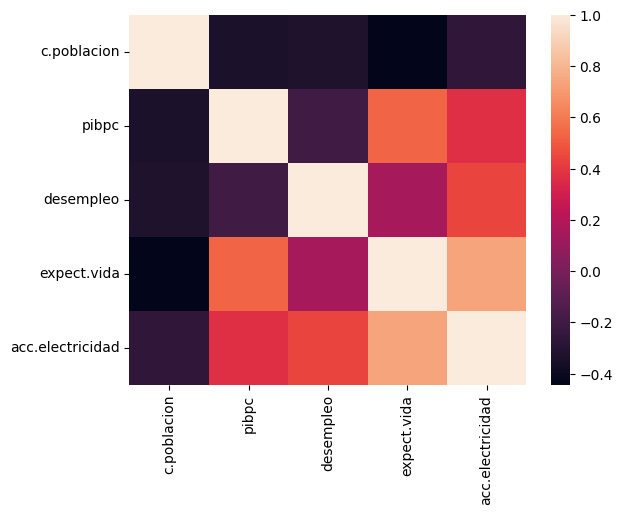

YR2004


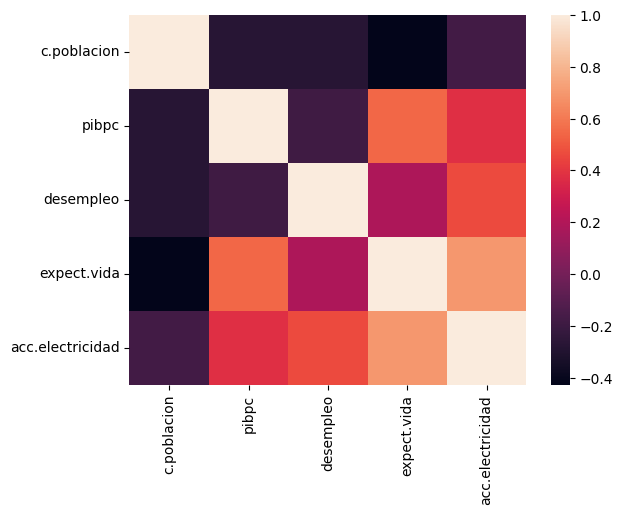

YR2005


YR2006


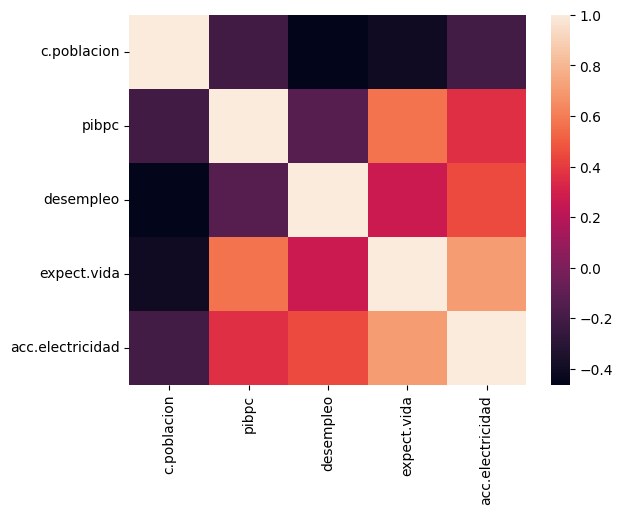

YR2007


YR2008


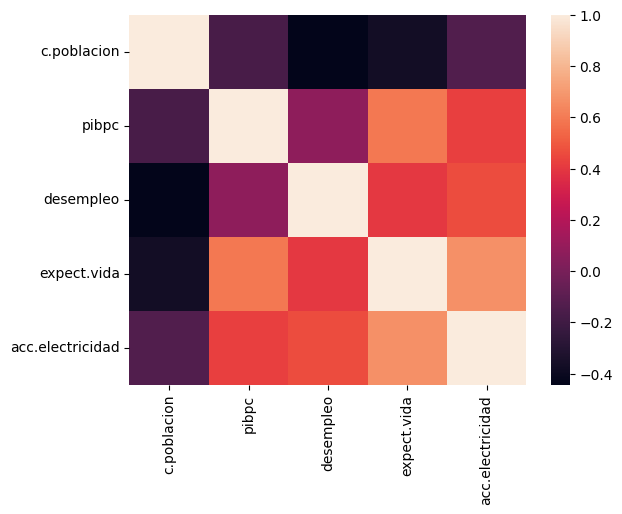

YR2009


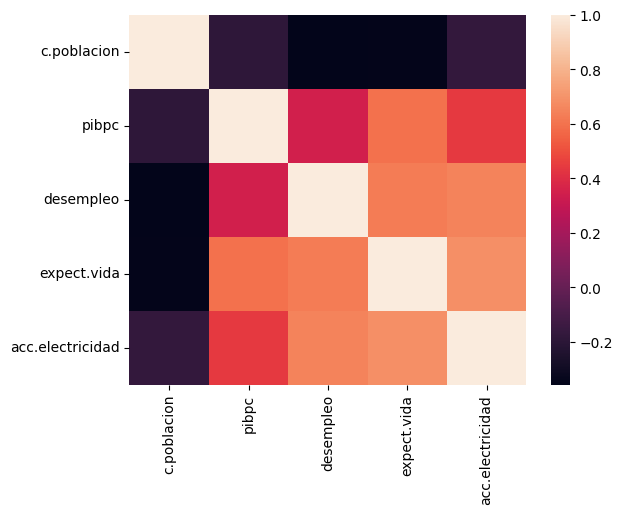

YR2010


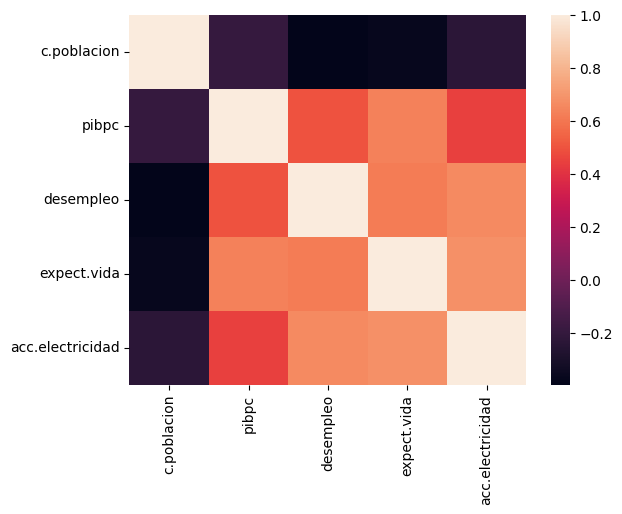

YR2011


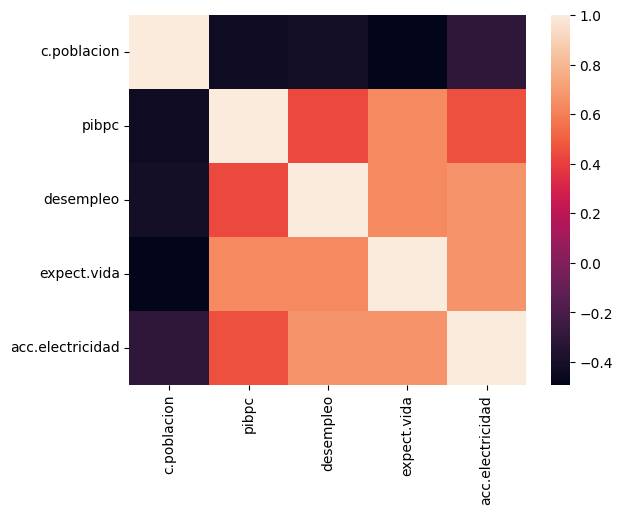

YR2012


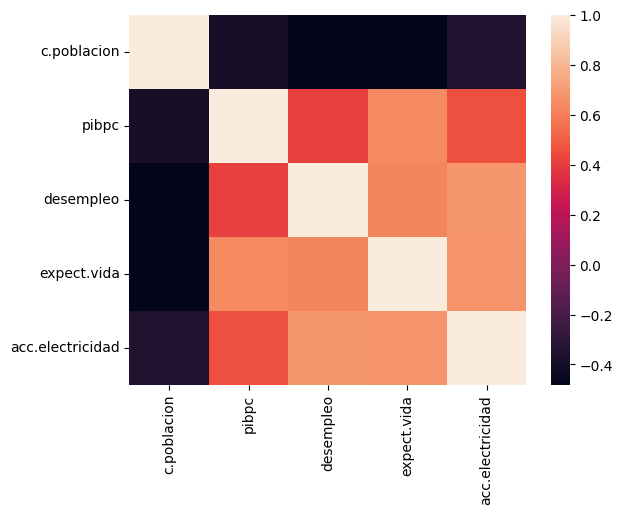

YR2013


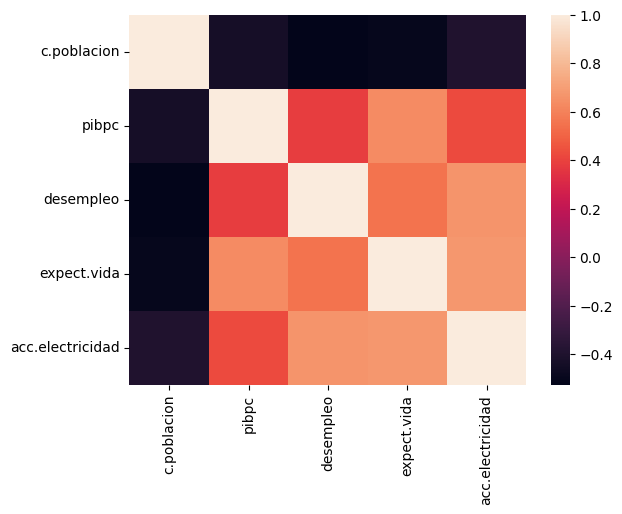

YR2014


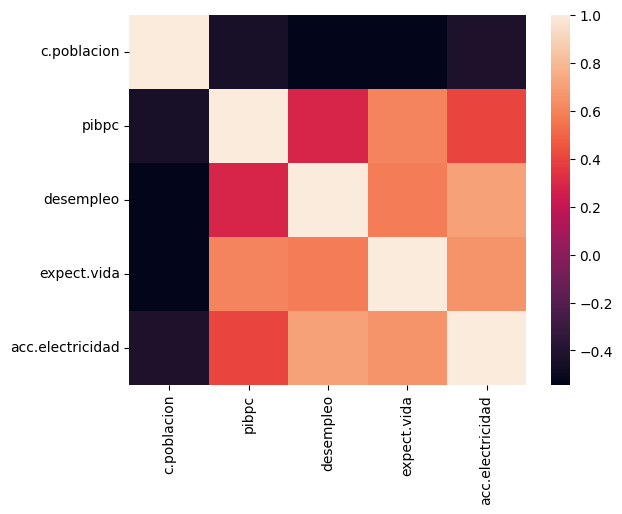

YR2015


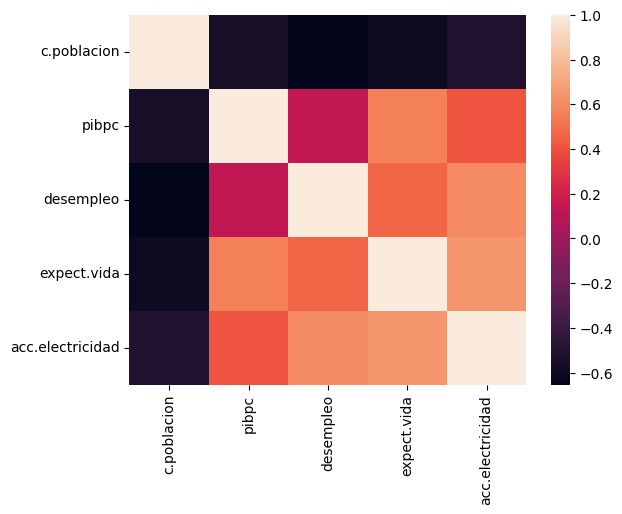

YR2016


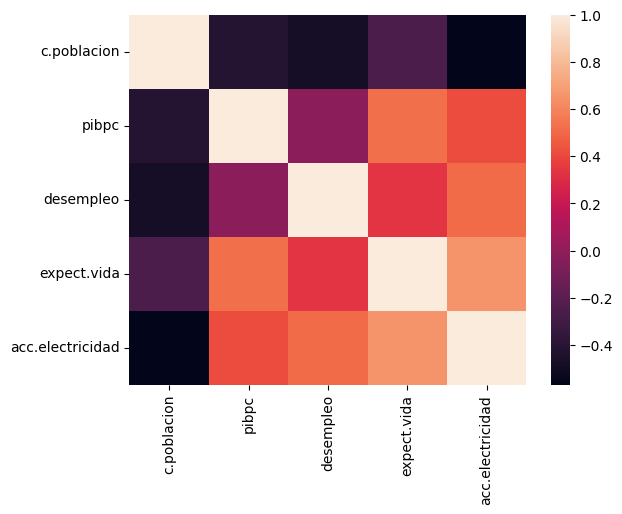

YR2017


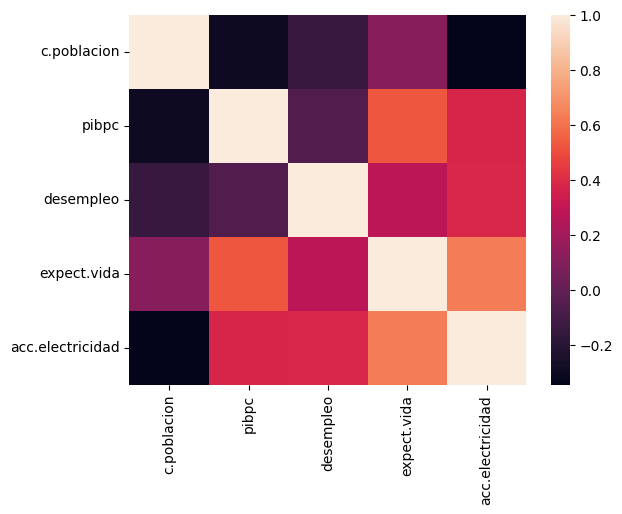

YR2018


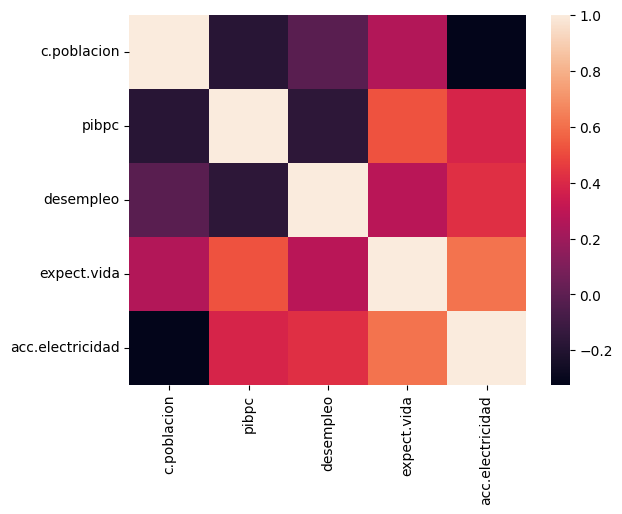

YR2019


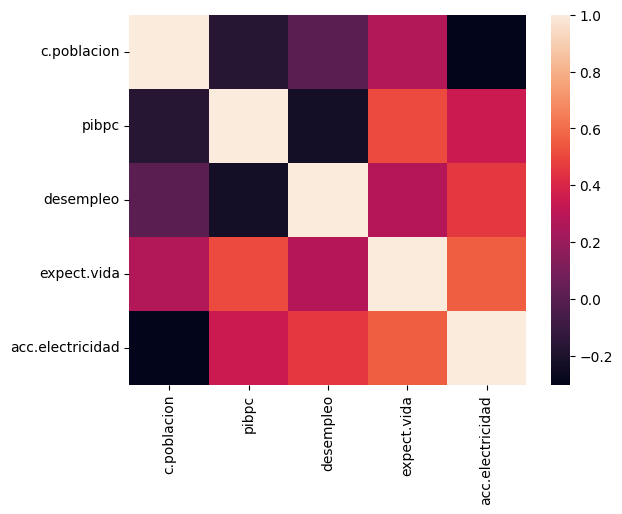

In [69]:
for year in dw['año'].unique():
  print (year)
  sns.heatmap(dw[dw['año']==year].corr())
  plt.show()


#**Exploración gráfica**

<Axes: xlabel='año', ylabel='pais'>

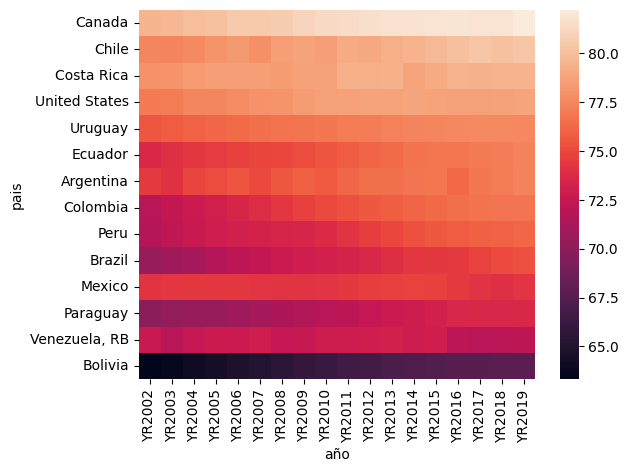

In [70]:
sns.heatmap(dw.pivot_table(index="pais",columns="año",values="expect.vida").sort_values(by="YR2019",ascending=False))

In [71]:
fig = px.line(dw, x="año", y="pibpc", color="pais",markers=True, title="Evolución del ingreso per capita")
fig.update_traces(textposition="bottom right")
fig.show()

In [72]:

fig = px.line(dw, x="año", y="expect.vida", color="pais",markers=True, title="Evolución de la expectativa de vida")
fig.update_traces(textposition="bottom right")
fig.show()


In [73]:
fig = px.line(dw, x="año", y="desempleo", color="pais",markers=True, title="Evolución del desempleo")
fig.update_traces(textposition="bottom right")
fig.show()

In [74]:
fig = px.line(dw, x="año", y="acc.electricidad", color="pais",markers=True, title="Evolución de acceso a la electricidad")
fig.update_traces(textposition="bottom right")
fig.show()

In [75]:
fig = px.line(dw, x="año", y="c.poblacion", color="pais",markers=True, title="Crecimiento de la población")
fig.update_traces(textposition="bottom right")
fig.show()

In [76]:
fig = px.bar(dw, x='año', y=['pibpc'],
             color='pais',
             labels={'pibpc':'PIBpc'},
             height=400)

fig.update_layout(title_text='PIB per capita a lo largo del tiempo')

fig.show()

In [77]:
import plotly.express as px
import pandas as pd
import numpy as np

In [78]:
fig = px.scatter(dw, x="año", y="acc.electricidad", color='pais')
fig.show()

In [136]:
paises_suramerica = ['Colombia', 'Venezuela, RB', 'Uruguay', 'Peru', 'Paraguay', 'Ecuador', 'Chile', 'Brasil', 'Bolivia', 'Argentina']
dw_filtrado = dw[dw['pais'].isin(paises_suramerica)]
media_por_pais = dw_filtrado.groupby(['pais']).agg({'pibpc': 'mean'}).reset_index()
fig = px.bar(media_por_pais, x='pais', y='pibpc', title='Comparación de PIB percapita en America del Sur', text='pibpc',color='pais')
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

fig.show()

In [80]:
paises_norteamerica = ['United States', 'Canada', 'Mexico']
dw_na = dw[dw['pais'].isin(paises_norteamerica)]
media_por_pais = dw_na.groupby(['pais']).agg({'pibpc': 'mean'}).reset_index()
fig = px.bar(media_por_pais, x='pais', y='pibpc', title='Comparación de PIB percapita en America del Norte', text='pibpc',color='pais')
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

fig.show()

In [128]:
 continente_dict={"United States": 'América del Norte',
    'Canada': 'América del Norte',
    'Mexico': 'América del Norte',
    'Colombia': 'América del Sur',
    'Venezuela, RB': 'América del Sur',
    'Uruguay': 'América del Sur',
    'Peru': 'América del Sur',
    'Paraguay': 'América del Sur',
    'Ecuador': 'América del Sur',
    'Chile': 'América del Sur',
    'Brazil': 'América del Sur',
    'Bolivia': 'América del Sur',
    'Argentina': 'América del Sur',
    'Costa Rica': 'América Central'}

dw['continente'] = dw['pais'].map(continente_dict)


In [130]:
fig = px.scatter(dw, x="año", y="acc.electricidad", color="continente",
                 size='desempleo', hover_data=['pais'])
fig.show()

#**Pruebas de hipotesis**

##**Variable 1: expectativa de vida**

**H0**: No hay diferencia significativa de la expectativa de vida entre Colombia y Norteamerica
**H1**: Existe una diferencia significativa de la expectativa de vida entre Colombia y Norteamerica

In [131]:
for year in dw['año'].unique():
  print (year)

  dw3=dw.query('año==@year')

  colombia = dw3[dw3['pais'] == 'Colombia']
  norteamerica = dw3[dw3['pais'].isin(["United States",'Canada','Mexico'])]

  expect_colombia = colombia['expect.vida']
  expect_norteamerica = norteamerica['expect.vida']

  t_statistic, p_value = stats.ttest_1samp(expect_norteamerica, expect_colombia)

  alpha = 0.05

  print(f'Valor de la estadística t: {t_statistic}')
  print(f'Valor p: {p_value}')

  if p_value < alpha:
      print('Rechazamos la hipótesis nula (H0):Existe una diferencia significativa de la expectativa de vida entre Colombia y Norteamerica.')
  else:
      print('No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar una diferencia significativa.')

YR2002
Valor de la estadística t: 3.1400142748380584
Valor p: 0.08820971546718515
No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar una diferencia significativa.
YR2003
Valor de la estadística t: 2.9587668822196194
Valor p: 0.09776505137180776
No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar una diferencia significativa.
YR2004
Valor de la estadística t: 2.822944405296132
Valor p: 0.10592037479107826
No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar una diferencia significativa.
YR2005
Valor de la estadística t: 2.5599709806148225
Valor p: 0.12468505088024982
No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar una diferencia significativa.
YR2006
Valor de la estadística t: 2.257358138600329
Valor p: 0.15256988794369925
No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar una diferencia significativa.
YR2007
Valor de l

**H0**: No hay diferencia significativa de la expectativa de vida entre Colombia y Suramerica
**H1**: Existe una diferencia significativa de la expectativa de vida entre Colombia y Suramerica

In [168]:
for year in dw['año'].unique():
  print (year)

  dw3_1=dw.query('año==@year')

  colombia = dw3_1[dw3_1['pais'] == 'Colombia']
  suramerica = dw3_1[dw3_1['pais'].isin(['Colombia', 'Venezuela, RB', 'Uruguay', 'Peru', 'Paraguay', 'Ecuador', 'Chile', 'Brasil', 'Bolivia', 'Argentina'])]

  expect_colombia = colombia['expect.vida']
  expect_suramerica = suramerica['expect.vida']

  t_statistic, p_value = stats.ttest_1samp(expect_suramerica, expect_colombia)

  alpha = 0.05

  print(f'Valor de la estadística t: {t_statistic}')
  print(f'Valor p: {p_value}')

  if p_value < alpha:
      print('Rechazamos la hipótesis nula (H0):Existe una diferencia significativa de la expectativa de vida entre Colombia y Suramerica')
  else:
      print('No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar una diferencia significativa')

YR2002
Valor de la estadística t: 0.26043533630923915
Valor p: 0.8011060083485158
No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar una diferencia significativa
YR2003
Valor de la estadística t: 0.03636587368226269
Valor p: 0.9718816766714176
No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar una diferencia significativa
YR2004
Valor de la estadística t: 0.07352477325234766
Valor p: 0.943193657675131
No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar una diferencia significativa
YR2005
Valor de la estadística t: -0.008857027551333545
Valor p: 0.9931500929883113
No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar una diferencia significativa
YR2006
Valor de la estadística t: -0.13137425208689246
Valor p: 0.8987230466307549
No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar una diferencia significativa
YR2007
Valor de la

##**Variable 2: crecimiento de la población**

**H0**: El crecimiento de la población no afecta de manera significativa al bienestar de la población entre Colombia y Suramerica
**H1**: El crecimiento de la población tiene un impacto significativo en el bienestar de la población entre Colombia y Suramerica

In [186]:
for year in dw['año'].unique():
  print (year)

  dw4=dw.query('año==@year')

  colombia = dw4[dw4['pais'] == 'Colombia']
  suramerica = dw4[dw4['pais'].isin(['Colombia', 'Venezuela, RB', 'Uruguay', 'Peru', 'Paraguay', 'Ecuador', 'Chile', 'Brasil', 'Bolivia', 'Argentina'])]

  poblacion_colombia = colombia['c.poblacion']
  poblacion_suramerica = suramerica['c.poblacion']

  t_statistic, p_value = stats.ttest_1samp(poblacion_suramerica, poblacion_colombia)

  alpha = 0.05

  print(f'Valor de la estadística t: {t_statistic}')
  print(f'Valor p: {p_value}')

  if p_value < alpha:
      print('Rechazamos la hipótesis nula (H0):El crecimiento de la población si tiene un impacto significativo en el bienestar de la poblacion entre Colombia y Suramerica.')
  else:
      print('No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar que el crecimiento de la poblacion afecta el bienestar de la poblacion.')

YR2002
Valor de la estadística t: -1.3397662977454132
Valor p: 0.21712962190916346
No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar que el crecimiento de la poblacion afecta el bienestar de la poblacion.
YR2003
Valor de la estadística t: -1.318214491984673
Valor p: 0.22392214273523542
No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar que el crecimiento de la poblacion afecta el bienestar de la poblacion.
YR2004
Valor de la estadística t: -1.2481587946743198
Valor p: 0.24726459200521475
No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar que el crecimiento de la poblacion afecta el bienestar de la poblacion.
YR2005
Valor de la estadística t: -1.0628481080669594
Valor p: 0.318878386160424
No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar que el crecimiento de la poblacion afecta el bienestar de la poblacion.
YR2006
Valor de la estadística t: -0.833838

**H0**: El crecimiento de la población no afecta de manera significativa al bienestar de la población entre Colombia y Norteamerica
**H1**: El crecimiento de la población tiene un impacto significativo en el bienestar de la población entre Colombia y Norteamerica

In [187]:
for year in dw['año'].unique():
  print (year)

  dw4_1=dw.query('año==@year')

  colombia = dw4_1[dw4_1['pais'] == 'Colombia']
  norteamerica = dw4_1[dw4_1['pais'].isin(["United States",'Canada','Mexico'])]

  poblacion_colombia = colombia['c.poblacion']
  poblacion_norteamerica = norteamerica['c.poblacion']

  t_statistic, p_value = stats.ttest_1samp(poblacion_norteamerica, poblacion_colombia)

  alpha = 0.05

  print(f'Valor de la estadística t: {t_statistic}')
  print(f'Valor p: {p_value}')

  if p_value < alpha:
      print('Rechazamos la hipótesis nula (H0):El crecimiento de la población si tiene un impacto significativo en el bienestar de la poblacion entre Colombia y Norteamerica.')
  else:
      print('No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar que el crecimiento de la poblacion afecta el bienestar de la poblacion.')

YR2002
Valor de la estadística t: -2.0124508136867165
Valor p: 0.1818195750167769
No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar que el crecimiento de la poblacion afecta el bienestar de la poblacion.
YR2003
Valor de la estadística t: -1.9655076145155057
Valor p: 0.18827928577983744
No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar que el crecimiento de la poblacion afecta el bienestar de la poblacion.
YR2004
Valor de la estadística t: -1.7695837461621302
Valor p: 0.21881830425986099
No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar que el crecimiento de la poblacion afecta el bienestar de la poblacion.
YR2005
Valor de la estadística t: -1.6128119548679325
Valor p: 0.24811754150673998
No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar que el crecimiento de la poblacion afecta el bienestar de la poblacion.
YR2006
Valor de la estadística t: -1.4957

##**Variable 3: PIB per capita**

**H0**: No hay diferencia significativa en el PIB entre Colombia y Suramérica
**H1**: Existe una diferencia significativa en el PIB entre Colombia y Suramerica

In [183]:
for year in dw['año'].unique():
  print (year)

  dw5=dw.query('año==@year')

  colombia = dw5[dw5['pais'] == 'Colombia']
  suramerica = dw5[dw5['pais'].isin(['Colombia', 'Venezuela, RB', 'Uruguay', 'Peru', 'Paraguay', 'Ecuador', 'Chile', 'Brasil', 'Bolivia', 'Argentina'])]

  pibpc_colombia = colombia['pibpc']
  pibpc_suramerica = suramerica['pibpc']

  t_statistic, p_value = stats.ttest_1samp(pibpc_suramerica, pibpc_colombia)

  alpha = 0.05

  print(f'Valor de la estadística t: {t_statistic}')
  print(f'Valor p: {p_value}')

  if p_value < alpha:
      print('Rechazamos la hipótesis nula (H0): Existe una diferencia significativa en el Ingreso Per Cápita entre Colombia y Suramérica.')
  else:
      print('No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar una diferencia significativa en el Ingreso Per Cápita entre Colombia y Suramérica.')

YR2002
Valor de la estadística t: 0.5200662462523804
Valor p: 0.6170983090124637
No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar una diferencia significativa en el Ingreso Per Cápita entre Colombia y Suramérica.
YR2003
Valor de la estadística t: 0.9705411352737167
Valor p: 0.3602015559290774
No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar una diferencia significativa en el Ingreso Per Cápita entre Colombia y Suramérica.
YR2004
Valor de la estadística t: 0.8811941865478715
Valor p: 0.4039090910478259
No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar una diferencia significativa en el Ingreso Per Cápita entre Colombia y Suramérica.
YR2005
Valor de la estadística t: 0.7242187690420763
Valor p: 0.489566114100353
No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar una diferencia significativa en el Ingreso Per Cápita entre Colombia y Suramérica.
YR200

**H0**: No hay diferencia significativa en el PIB entre Colombia y Norteamerica
**H1**: Existe una diferencia significativa en el PIB entre Colombia y Norteamerica

In [179]:
for year in dw['año'].unique():
  print (year)

  dw5_1=dw.query('año==@year')

  colombia = dw5_1[dw5_1['pais'] == 'Colombia']
  norteamerica = dw5_1[dw5_1['pais'].isin(["United States",'Canada','Mexico'])]

  pibpc_colombia = colombia['pibpc']
  pibpc_norteamerica = norteamerica['pibpc']

  t_statistic, p_value = stats.ttest_1samp(pibpc_norteamerica, pibpc_colombia)

  alpha = 0.05

  print(f'Valor de la estadística t: {t_statistic}')
  print(f'Valor p: {p_value}')

  if p_value < alpha:
      print('Rechazamos la hipótesis nula (H0): Existe una diferencia significativa en el Ingreso Per Cápita entre Colombia y Suramérica.')
  else:
      print('No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar una diferencia significativa en el Ingreso Per Cápita entre Colombia y Suramérica.')

YR2002
Valor de la estadística t: 2.3799550465645507
Valor p: 0.14032215339090243
No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar una diferencia significativa en el Ingreso Per Cápita entre Colombia y Suramérica.
YR2003
Valor de la estadística t: 2.3879290593923264
Valor p: 0.13957330025878562
No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar una diferencia significativa en el Ingreso Per Cápita entre Colombia y Suramérica.
YR2004
Valor de la estadística t: 2.3876685469306898
Valor p: 0.13959767772082476
No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar una diferencia significativa en el Ingreso Per Cápita entre Colombia y Suramérica.
YR2005
Valor de la estadística t: 2.405419034195059
Valor p: 0.13795009642052938
No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar una diferencia significativa en el Ingreso Per Cápita entre Colombia y Suramérica.
Y

##**Variable 4: acceso a electricidad**

**H0**: No hay diferencia significativa en el PIB entre Colombia y Suramérica
**H1**: Existe una diferencia significativa en el PIB entre Colombia y Suramerica

In [184]:
for year in dw['año'].unique():
  print (year)

  dw6=dw.query('año==@year')

  colombia = dw6[dw6['pais'] == 'Colombia']
  suramerica = dw6[dw6['pais'].isin(['Colombia', 'Venezuela, RB', 'Uruguay', 'Peru', 'Paraguay', 'Ecuador', 'Chile', 'Brasil', 'Bolivia', 'Argentina'])]

  electricidad_colombia = colombia['acc.electricidad']
  electricidad_suramerica = suramerica['acc.electricidad']

  t_statistic, p_value = stats.ttest_1samp(electricidad_suramerica, electricidad_colombia)

  alpha = 0.05

  print(f'Valor de la estadística t: {t_statistic}')
  print(f'Valor p: {p_value}')

  if p_value < alpha:
      print('Rechazamos la hipótesis nula (H0): Existe una diferencia significativa en el acceso a la electricidad entre Colombia y Suramérica.')
  else:
      print('No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar una diferencia significativa en el acceso a la electricidad entre Colombia y Suramérica.')

YR2002
Valor de la estadística t: -1.1865413123922208
Valor p: 0.269447638526177
No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar una diferencia significativa en el acceso a la electricidad entre Colombia y Suramérica.
YR2003
Valor de la estadística t: -1.2439271923443964
Valor p: 0.24873779026109227
No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar una diferencia significativa en el acceso a la electricidad entre Colombia y Suramérica.
YR2004
Valor de la estadística t: -1.13906602879799
Valor p: 0.2876322915037997
No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar una diferencia significativa en el acceso a la electricidad entre Colombia y Suramérica.
YR2005
Valor de la estadística t: -1.4340794870238363
Valor p: 0.1894574774088204
No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar una diferencia significativa en el acceso a la electricidad entre C

In [188]:
for year in dw['año'].unique():
  print (year)

  dw6_1=dw.query('año==@year')

  colombia = dw6_1[dw6_1['pais'] == 'Colombia']
  norteamerica = dw6_1[dw6_1['pais'].isin(["United States",'Canada','Mexico'])]

  electricidad_colombia = colombia['acc.electricidad']
  electricidad_norteamerica = norteamerica['acc.electricidad']

  t_statistic, p_value = stats.ttest_1samp(electricidad_norteamerica, electricidad_colombia)

  alpha = 0.05

  print(f'Valor de la estadística t: {t_statistic}')
  print(f'Valor p: {p_value}')

  if p_value < alpha:
      print('Rechazamos la hipótesis nula (H0): Existe una diferencia significativa en el acceso a la electricidad entre Colombia y Norteamérica.')
  else:
      print('No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar una diferencia significativa en el acceso a la electricidad entre Colombia y Norteamérica.')

YR2002
Valor de la estadística t: 6.3026596693606844
Valor p: 0.02426161060441182
Rechazamos la hipótesis nula (H0): Existe una diferencia significativa en el acceso a la electricidad entre Colombia y Norteamérica.
YR2003
Valor de la estadística t: 4.592814423160309
Valor p: 0.04428183523417555
Rechazamos la hipótesis nula (H0): Existe una diferencia significativa en el acceso a la electricidad entre Colombia y Norteamérica.
YR2004
Valor de la estadística t: 9.100268991801006
Valor p: 0.011860720106495451
Rechazamos la hipótesis nula (H0): Existe una diferencia significativa en el acceso a la electricidad entre Colombia y Norteamérica.
YR2005
Valor de la estadística t: 7.99489539686228
Valor p: 0.015287130251729333
Rechazamos la hipótesis nula (H0): Existe una diferencia significativa en el acceso a la electricidad entre Colombia y Norteamérica.
YR2006
Valor de la estadística t: 13.473629075316278
Valor p: 0.00546336697809325
Rechazamos la hipótesis nula (H0): Existe una diferencia sig

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



##**Variable 5: Desempleo**
**H0**: No hay diferencia significativa en las tasas de desempleo entre Colombia y suramerica **H1**: Existe una diferencia significativa en las tasas de desempleo entre Colombia y suramerica

In [125]:
for year in dw['año'].unique():
  print (year)

  dw7=dw.query('año==@year')

  colombia = dw7[dw7['pais'] == 'Colombia']
  suramerica = dw7[dw7['pais'].isin(['Colombia', 'Venezuela, RB', 'Uruguay', 'Peru', 'Paraguay', 'Ecuador', 'Chile', 'Brasil', 'Bolivia', 'Argentina'])]

  desempleo_colombia = colombia['desempleo']
  desempleo_suramerica = suramerica['desempleo']

  t_statistic, p_value = stats.ttest_1samp(desempleo_suramerica, desempleo_colombia)

  alpha = 0.05

  print(f'Valor de la estadística t: {t_statistic}')
  print(f'Valor p: {p_value}')

  if p_value < alpha:
      print('Rechazamos la hipótesis nula (H0): Existe una diferencia significativa en la tasa de desempleo entre Colombia y Suramérica.')
  else:
      print('No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar una diferencia significativa en la tasa de desempleo entre Colombia y Suramérica.')

YR2002
Valor de la estadística t: -2.331403531593157
Valor p: 0.052505281278629294
No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar una diferencia significativa en la tasa de desempleo entre Colombia y Suramérica.
YR2003
Valor de la estadística t: -2.497429545400689
Valor p: 0.04114669509186069
Rechazamos la hipótesis nula (H0): Existe una diferencia significativa en la tasa de desempleo entre Colombia y Suramérica.
YR2004
Valor de la estadística t: -3.1953196308224037
Valor p: 0.015164102507993707
Rechazamos la hipótesis nula (H0): Existe una diferencia significativa en la tasa de desempleo entre Colombia y Suramérica.
YR2005
Valor de la estadística t: -3.0332906283051604
Valor p: 0.01902607014898632
Rechazamos la hipótesis nula (H0): Existe una diferencia significativa en la tasa de desempleo entre Colombia y Suramérica.
YR2006
Valor de la estadística t: -3.141694295528037
Valor p: 0.016340466898966094
Rechazamos la hipótesis nula (H0): Existe una 

**H0**: No hay diferencia significativa en las tasas de desempleo entre Colombia y Norteamerica **H1**: Existe una diferencia significativa en las tasas de desempleo entre Colombia y Norteamerica

In [185]:
for year in dw['año'].unique():
  print (year)

  dw7_1=dw.query('año==@year')

  colombia = dw7_1[dw7_1['pais'] == 'Colombia']
  norteamerica = dw7_1[dw7_1['pais'].isin(["United States",'Canada','Mexico'])]

  desempleo_colombia = colombia['desempleo']
  desempleo_norteamerica = norteamerica['desempleo']

  t_statistic, p_value = stats.ttest_1samp(desempleo_norteamerica, desempleo_colombia)

  alpha = 0.05

  print(f'Valor de la estadística t: {t_statistic}')
  print(f'Valor p: {p_value}')

  if p_value < alpha:
      print('Rechazamos la hipótesis nula (H0): Existe una diferencia significativa en la tasa de desempleo entre Colombia y Norteamerica.')
  else:
      print('No podemos rechazar la hipótesis nula (H0): No hay evidencia suficiente para afirmar una diferencia significativa en la tasa de desempleo entre Colombia y Norteamerica.')

YR2002
Valor de la estadística t: -7.498726330974938
Valor p: 0.01732305813169899
Rechazamos la hipótesis nula (H0): Existe una diferencia significativa en la tasa de desempleo entre Colombia y Norteamerica.
YR2003
Valor de la estadística t: -7.115170036246426
Valor p: 0.01918619761428428
Rechazamos la hipótesis nula (H0): Existe una diferencia significativa en la tasa de desempleo entre Colombia y Norteamerica.
YR2004
Valor de la estadística t: -8.70399265160311
Valor p: 0.01294393975563007
Rechazamos la hipótesis nula (H0): Existe una diferencia significativa en la tasa de desempleo entre Colombia y Norteamerica.
YR2005
Valor de la estadística t: -7.289618879017765
Valor p: 0.018303645507393794
Rechazamos la hipótesis nula (H0): Existe una diferencia significativa en la tasa de desempleo entre Colombia y Norteamerica.
YR2006
Valor de la estadística t: -7.646309987555414
Valor p: 0.016677270061208643
Rechazamos la hipótesis nula (H0): Existe una diferencia significativa en la tasa de 

#**ANALISIS DE DATOS GEOREFERENCIADOS**


In [88]:

pip install osmnx rioxarray datashader contextily xarray pysal pygeos

In [89]:
from shapely.geometry import Polygon
from shapely import geometry

import pysal
from pysal.lib import cg as geometry
from pysal.lib import weights
from pysal.viz import splot
from pysal.explore import esda
from pysal.lib import weights

from splot.esda import plot_moran
from splot import esda as esdaplot

from sklearn.cluster import DBSCAN

from pointpats import centrography
import libpysal
from pygeos import minimum_rotated_rectangle, from_shapely, to_shapely
from pointpats import (
    distance_statistics,
    QStatistic,
    random,
    PointPattern,
)

In [92]:
gt_polygons = gpd.read_file('/countries.geo.json')

In [93]:
gt_polygons.head()

id                  name  \
0  AFG           Afghanistan   
1  AGO                Angola   
2  ALB               Albania   
3  ARE  United Arab Emirates   
4  ARG             Argentina   

                                            geometry  
0  POLYGON ((61.21082 35.65007, 62.23065 35.27066...  
1  MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6...  
2  POLYGON ((20.59025 41.85540, 20.46317 41.51509...  
3  POLYGON ((51.57952 24.24550, 51.75744 24.29407...  
4  MULTIPOLYGON (((-65.50000 -55.20000, -66.45000...

<Axes: >

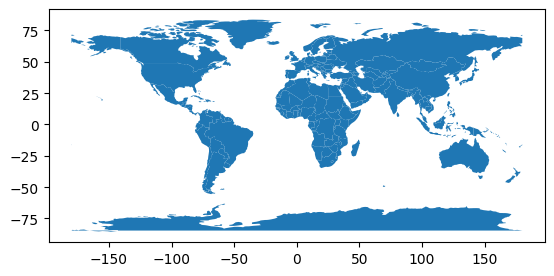

In [94]:
type(gt_polygons.geometry[31])
gt_polygons.plot()

<Axes: >

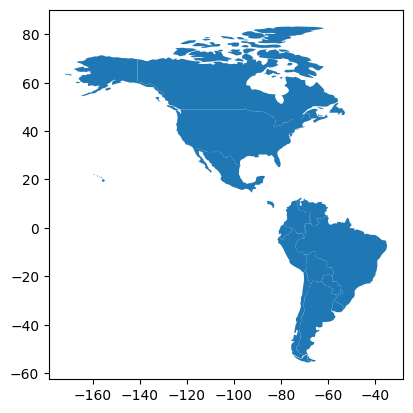

In [95]:
gt_polygons.query('name == "Colombia"|name =="Argentina"|name =="Brazil"|name =="Bolivia"|name =="United States of America"|name =="Canada"|name =="Costa Rica"|name =="Uruguay"|name =="Paraguay"|name =="Ecuador"|name =="Mexico"|name =="Venezuela"|name =="Peru"|name =="Chile"')
gt_polygons.query('name == "Colombia"|name =="Argentina"|name =="Brazil"|name =="Bolivia"|name =="United States of America"|name =="Canada"|name =="Costa Rica"|name =="Uruguay"|name =="Paraguay"|name =="Ecuador"|name =="Mexico"|name =="Venezuela"|name =="Peru"|name =="Chile"').plot()


In [139]:
paisesdw = ['Argentina', 'Bolivia', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Ecuador', 'Mexico', 'Paraguay', 'Peru', 'United States of America', 'Uruguay', 'Venezuela']
geo = gt_polygons[gt_polygons['name'].isin(paisesdw)]
geo=geo.drop('id',axis=1)
geo

name  \
4                   Argentina   
22                    Bolivia   
23                     Brazil   
28                     Canada   
30                      Chile   
36                   Colombia   
37                 Costa Rica   
47                    Ecuador   
104                    Mexico   
127                      Peru   
134                  Paraguay   
169                   Uruguay   
170  United States of America   
172                 Venezuela   

                                              geometry  
4    MULTIPOLYGON (((-65.50000 -55.20000, -66.45000...  
22   POLYGON ((-62.84647 -22.03498, -63.98684 -21.9...  
23   POLYGON ((-57.62513 -30.21629, -56.29090 -28.8...  
28   MULTIPOLYGON (((-63.66450 46.55001, -62.93930 ...  
30   MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...  
36   POLYGON ((-75.37322 -0.15203, -75.80147 0.0848...  
37   POLYGON ((-82.96578 8.22503, -83.50844 8.44693...  
47   POLYGON ((-80.30256 -3.40486, -79.77029 -2.657...  
104  POLYGON ((-97.14001 25.87000, -97.52807 24.992...  
127  POLYGON ((-69.59042 -17.58001, -69.85844 -18.0...  
134  POLYGON ((-62.68506 -22.24903, -62.29118 -21.0...  
169  POLYGON ((-57.62513 -30.21629, -56.97603 -30.1...  
170  MULTIPOLYGON (((-155.54211 19.08348, -155.6881...  
172  POLYGON ((-71.33158 11.77628, -71.36001 11.539...

In [140]:
old_value = "United States of America"
new_value = "United States"

geo['name'] = geo['name'].replace(old_value, new_value)

In [141]:
old_value = "Venezuela"
new_value = "Venezuela, RB"
geo['name'] = geo['name'].replace(old_value, new_value)

In [142]:
geo = geo.rename(columns={'name': 'pais'})
geo

pais                                           geometry
4        Argentina  MULTIPOLYGON (((-65.50000 -55.20000, -66.45000...
22         Bolivia  POLYGON ((-62.84647 -22.03498, -63.98684 -21.9...
23          Brazil  POLYGON ((-57.62513 -30.21629, -56.29090 -28.8...
28          Canada  MULTIPOLYGON (((-63.66450 46.55001, -62.93930 ...
30           Chile  MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...
36        Colombia  POLYGON ((-75.37322 -0.15203, -75.80147 0.0848...
37      Costa Rica  POLYGON ((-82.96578 8.22503, -83.50844 8.44693...
47         Ecuador  POLYGON ((-80.30256 -3.40486, -79.77029 -2.657...
104         Mexico  POLYGON ((-97.14001 25.87000, -97.52807 24.992...
127           Peru  POLYGON ((-69.59042 -17.58001, -69.85844 -18.0...
134       Paraguay  POLYGON ((-62.68506 -22.24903, -62.29118 -21.0...
169        Uruguay  POLYGON ((-57.62513 -30.21629, -56.97603 -30.1...
170  United States  MULTIPOLYGON (((-155.54211 19.08348, -155.6881...
172  Venezuela, RB  POLYGON ((-71.33158 11.77628, -71.36001 11.539...

In [143]:
dw_2 = geo.merge(dw, on= 'pais', how='left')


In [117]:
dw_2['pais'].value_counts()

Argentina        18
Bolivia          18
Brazil           18
Canada           18
Chile            18
Colombia         18
Costa Rica       18
Ecuador          18
Mexico           18
Peru             18
Paraguay         18
Uruguay          18
United States    18
Venezuela, RB    18
Name: pais, dtype: int64

In [145]:
dw_2.query("pais == 'Colombia'")

pais                                           geometry     año  \
90   Colombia  POLYGON ((-75.37322 -0.15203, -75.80147 0.0848...  YR2002   
91   Colombia  POLYGON ((-75.37322 -0.15203, -75.80147 0.0848...  YR2003   
92   Colombia  POLYGON ((-75.37322 -0.15203, -75.80147 0.0848...  YR2004   
93   Colombia  POLYGON ((-75.37322 -0.15203, -75.80147 0.0848...  YR2005   
94   Colombia  POLYGON ((-75.37322 -0.15203, -75.80147 0.0848...  YR2006   
95   Colombia  POLYGON ((-75.37322 -0.15203, -75.80147 0.0848...  YR2007   
96   Colombia  POLYGON ((-75.37322 -0.15203, -75.80147 0.0848...  YR2008   
97   Colombia  POLYGON ((-75.37322 -0.15203, -75.80147 0.0848...  YR2009   
98   Colombia  POLYGON ((-75.37322 -0.15203, -75.80147 0.0848...  YR2010   
99   Colombia  POLYGON ((-75.37322 -0.15203, -75.80147 0.0848...  YR2011   
100  Colombia  POLYGON ((-75.37322 -0.15203, -75.80147 0.0848...  YR2012   
101  Colombia  POLYGON ((-75.37322 -0.15203, -75.80147 0.0848...  YR2013   
102  Colombia  POLYGON ((-75.37322 -0.15203, -75.80147 0.0848...  YR2014   
103  Colombia  POLYGON ((-75.37322 -0.15203, -75.80147 0.0848...  YR2015   
104  Colombia  POLYGON ((-75.37322 -0.15203, -75.80147 0.0848...  YR2016   
105  Colombia  POLYGON ((-75.37322 -0.15203, -75.80147 0.0848...  YR2017   
106  Colombia  POLYGON ((-75.37322 -0.15203, -75.80147 0.0848...  YR2018   
107  Colombia  POLYGON ((-75.37322 -0.15203, -75.80147 0.0848...  YR2019   

     c.poblacion        pibpc  desempleo  expect.vida  acc.electricidad  \
90      1.534867  2421.162103     15.630       71.939         94.881042   
91      1.481132  2305.170507     14.190       72.361         95.077187   
92      1.428171  2811.459450     13.720       72.695         95.278801   
93      1.365652  3448.538274     11.870       73.081         96.800000   
94      1.298865  3782.603504     10.963       73.468         95.726227   
95      1.239967  4762.082973     10.250       73.837         95.980408   
96      1.167874  5534.689447     10.520       74.295         96.806763   
97      1.131541  5245.951665     11.320       74.742         96.057229   
98      1.126885  6392.758026     10.980       75.033         96.788995   
99      1.093583  7392.943600     10.110       75.320         96.693600   
100     1.039665  8096.801510      9.740       75.597         97.032176   
101     0.990035  8263.641929      9.050       75.827         97.779418   
102     0.947137  8167.472842      8.570       76.043         97.790938   
103     0.941994  6228.651622      8.300       76.257         98.186898   
104     1.068612  5936.261022      8.690       76.471         98.400000   
105     1.512290  6449.970987      8.870       76.646         98.500000   
106     1.895587  6782.037920      9.110       76.748         98.500000   
107     1.830747  6436.509215      9.960       76.752         99.444260   

          continente  
90   América del Sur  
91   América del Sur  
92   América del Sur  
93   América del Sur  
94   América del Sur  
95   América del Sur  
96   América del Sur  
97   América del Sur  
98   América del Sur  
99   América del Sur  
100  América del Sur  
101  América del Sur  
102  América del Sur  
103  América del Sur  
104  América del Sur  
105  América del Sur  
106  América del Sur  
107  América del Sur

In [146]:
dw_2.to_csv('dataframe2.csv',index=False)